## Proyecto 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats # Para cálculos estadísticos como la moda, media, mediana, etc

# sns.set();

import warnings
warnings.filterwarnings("ignore")

In [2]:
def iniciar_df():
    global data
    data = pd.read_csv(r'D:\Google_Drive\Colab Notebooks\DataSets\DS_Proyecto_01_Datos_Properati.csv')
#     data = pd.read_csv('../input/ds-proyecto-01-datos-properati/DS_Proyecto_01_Datos_Properati.csv')
    
    #0. Elimnar duplicados
    data = data.drop(data[data.duplicated()==True].index)
    
    
    # Eliminamos algunas variables que no aportan mucho al estudio del data_Set
    data = data.drop(['l1','title','description','start_date','end_date','created_on','lat','lon','operation_type','currency'],axis=1)

    #Eliminamos también los valores errados como la superficie cubierta a la mayor
    data=data.drop(data[(data.surface_covered)>(data.surface_total)].index)
    
def tres_sigmas(data_aux):
    global  data, mascara_outliers
    valor_medio = data_aux.mean()
    std = data_aux.std()
    minimo = valor_medio - 3 * std
    maximo = valor_medio + 3 * std
    mascara_outliers = (data_aux< minimo) | (data_aux > maximo)

    while (mascara_outliers.sum()>0):
        data=data.drop(data[mascara_outliers].index)
        data_aux=data_aux.drop(data_aux[mascara_outliers].index)
        tres_sigmas(data_aux)            

# Parte A
> ### Detección y eliminación de Outliers

> ### Encoding

> ### Imputación de valores faltantes

> ### Escalado de datos

> ### Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

### Detección y eliminación de Outliers

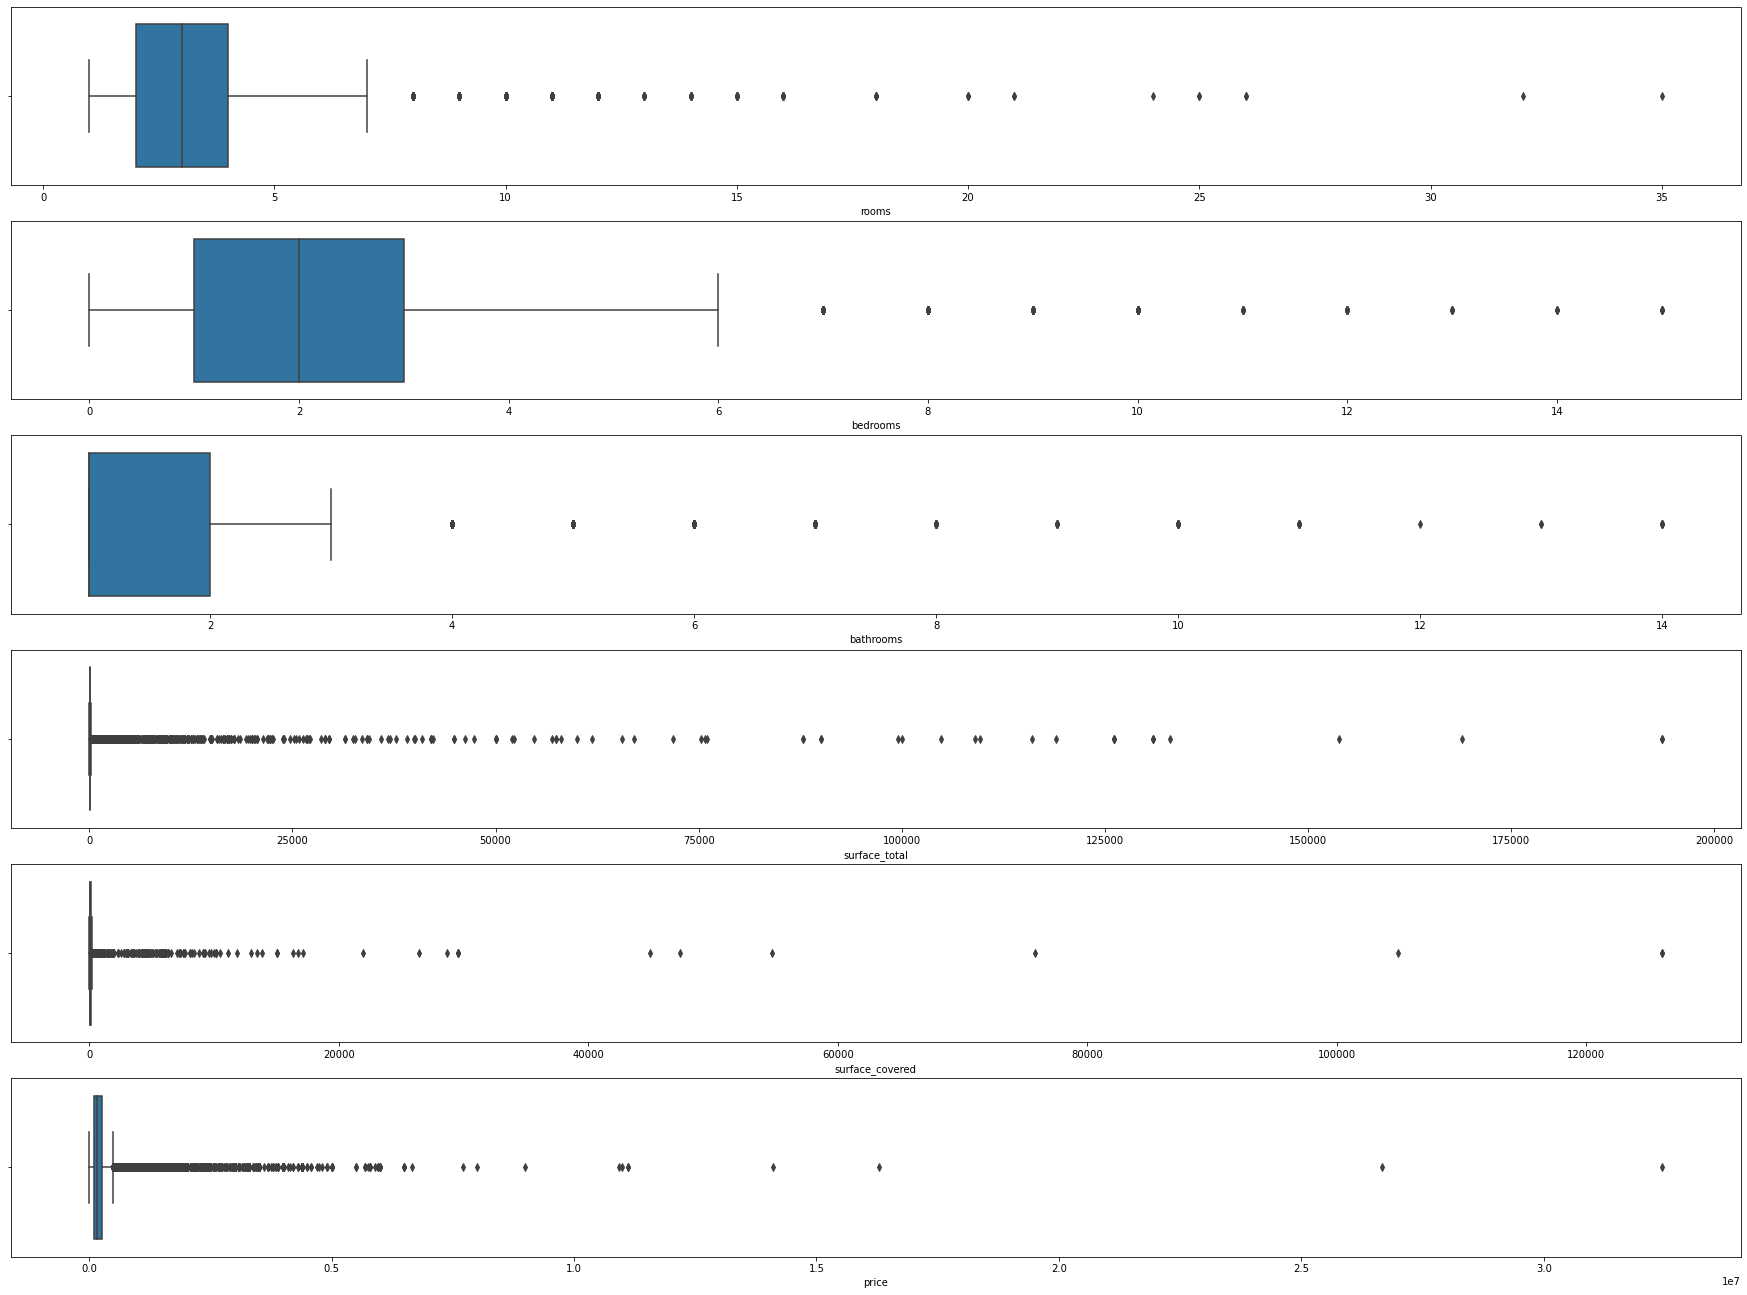

In [ ]:
plt.figure(figsize=(31,23))
for i in range(2,8):
    plt.subplot(6,1,(i-1))    
    sns.boxplot(data.iloc[:, i])

> El gráfico mostrado arriba, indica los outliers para las columnas númericas. Se evidencia Una cantidad considerable de estos outliers, lo que se trabajará ahora es en detectar y eliminarlos para tener un gráfico con la menor cantidad de outliers posibles

In [ ]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,142871.000000,142871.000000,136962.000000,122610.000000,121532.000000,1.428710e+05
mean,3.075509,1.978414,1.597385,219.694576,104.463006,2.407017e+05
std,1.406420,1.145377,0.886098,2066.221618,741.250119,3.153970e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,52.000000,47.000000,1.100000e+05
50%,3.000000,2.000000,1.000000,79.000000,68.000000,1.652400e+05
75%,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


> La tabla mostrada indica los valores estadísticos de las columnas del data frame. La desviación estándar refleja valores muy altos, esto se explica por la presencia de los outliers

> Detectamos y eliminamos los outliers en las columnas númericas. Usaremos la función que hemos creado `tres_sigmas()` para la deteción y eliminación de estos outliers

In [290]:
%%time
iniciar_df()
t1 = data.shape[0]

for i in range(2,8):
    tres_sigmas(data.iloc[:, i])
    
print(f'Se eliminaron: {t1 - data.shape[0]} registros con outliers')        


Se eliminaron: 32221 registros con outliers
Wall time: 3.49 s


> Gráficamos sin los outliers


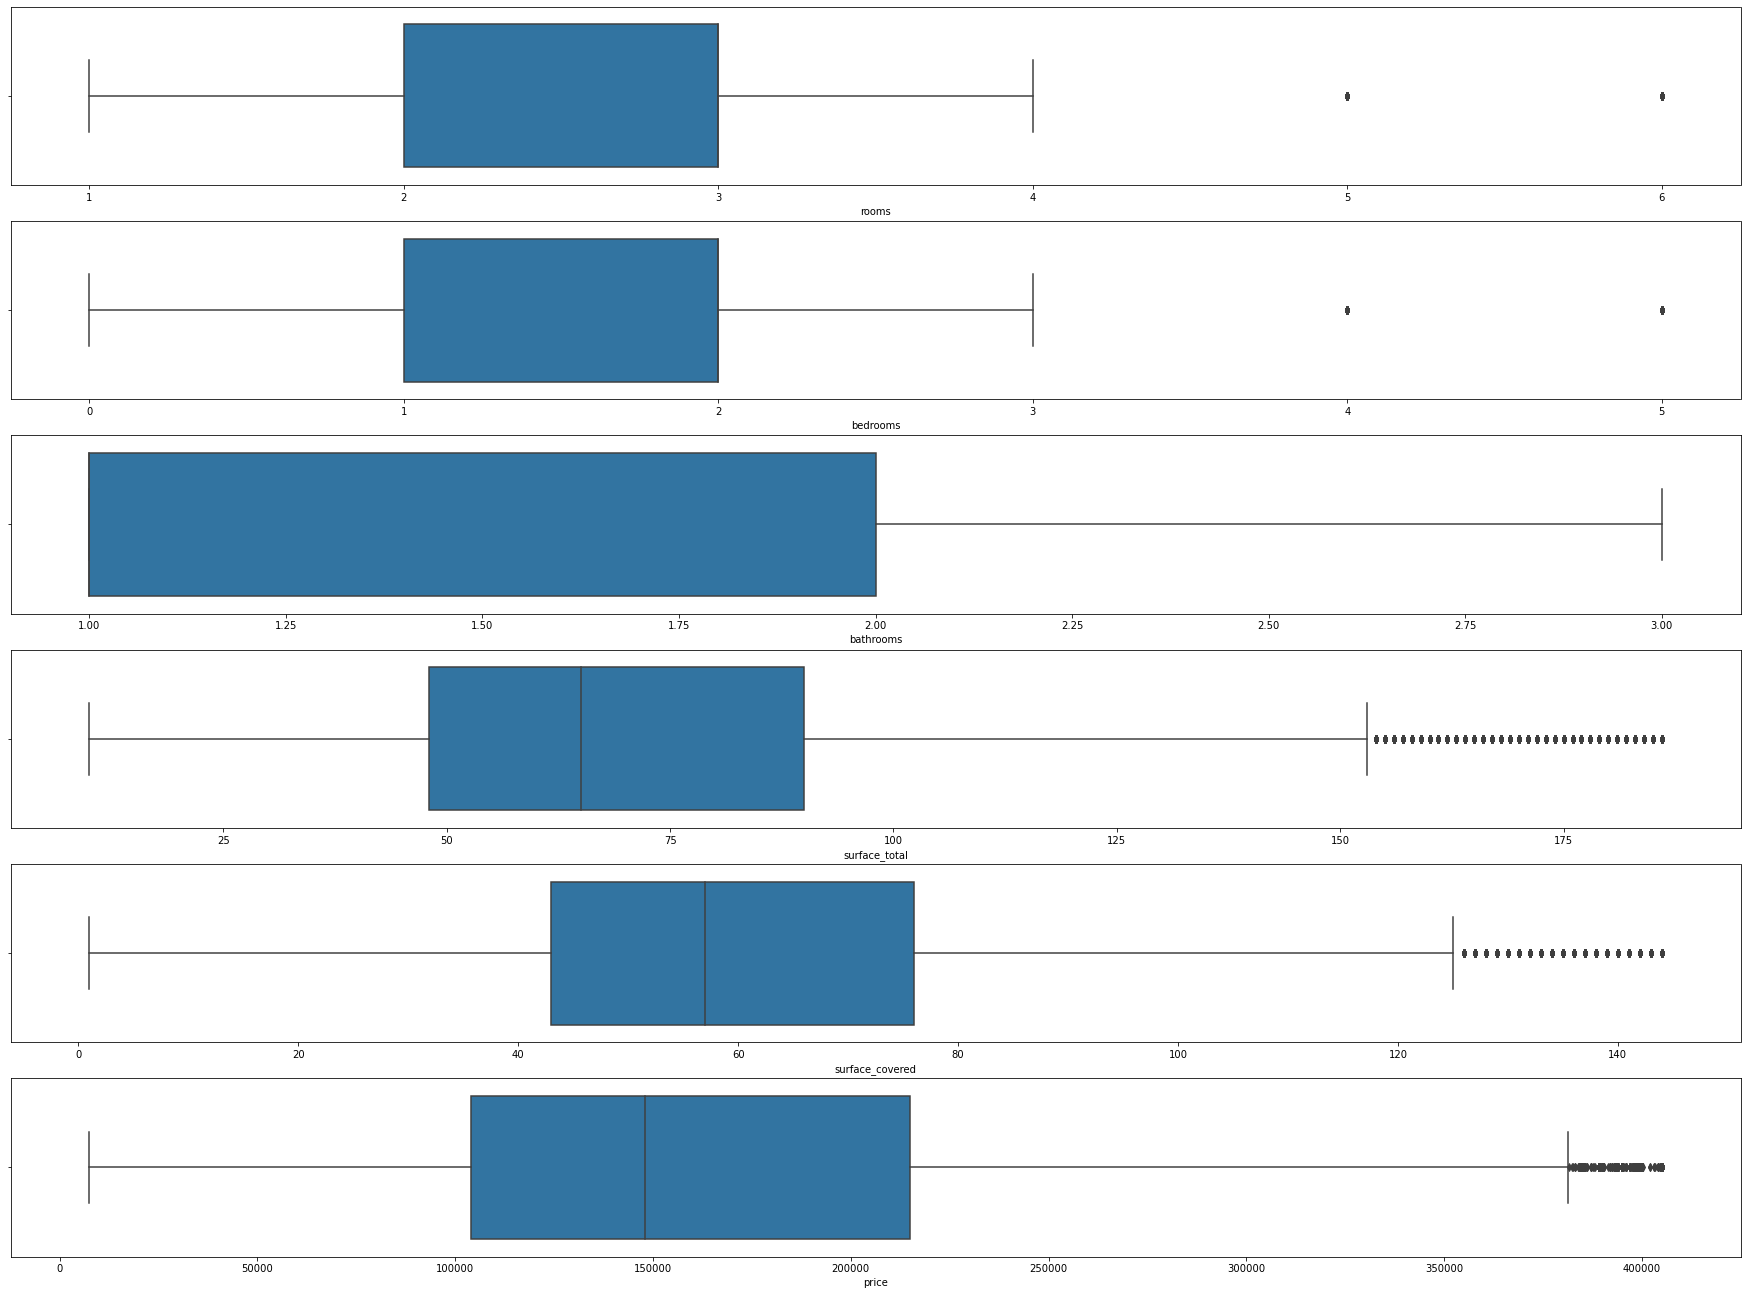

In [ ]:
plt.figure(figsize=(31,23))
for i in range(2,8):
    plt.subplot(6,1,(i-1))    
    sns.boxplot(data.iloc[:, i])
# plt.savefig("img\sin_outliers1.png")

#Medir impacto

> Ahora, con el gráfico mostrado se evidencia valores más normales con muchos menos outliers que en la primera sección. 

In [ ]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,110650.000000,110650.000000,106084.000000,92810.000000,92497.000000,110650.000000
mean,2.649851,1.653466,1.331728,72.112531,62.168189,164789.032038
std,0.985740,0.876532,0.552506,32.451291,25.002839,80200.873494
min,1.000000,0.000000,1.000000,10.000000,1.000000,7500.000000
25%,2.000000,1.000000,1.000000,48.000000,43.000000,104000.000000
50%,3.000000,2.000000,1.000000,65.000000,57.000000,148000.000000
75%,3.000000,2.000000,2.000000,90.000000,76.000000,214900.000000
max,6.000000,5.000000,3.000000,186.000000,144.000000,405000.000000


> A diferencia del primer gráfico de cajas, ahora se aprecia una menor cantidad de outliers en el dataframe. También se imprimió la tabla con valores estadísticos para revisar los valores que quedaron, se aprecia que la desviación estándar ha reducido en comparación con la primera tabla de estadísticos.

### Imputación de valores faltantes

In [275]:
data.isna().sum()

l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           4566
surface_total      17840
surface_covered    18153
price                  0
property_type          0
dtype: int64

Se observa que los valores faltantes son para `bathrooms`, `surface_total` y `surface_covered`

> Valores faltantes para baños

In [6]:
data_vf = data.property_type[(data.bathrooms.isnull())].groupby([data.property_type]).size().reset_index(name='Valores_NA')
data_vf['Valores_no_NA'] = data.property_type[(data.bathrooms.isnull()==False )].groupby([data.property_type]).size().reset_index(name='Valores_NA').iloc[:,1]

data_vf['% faltantes'] = data_vf['Valores_NA'] / (data_vf['Valores_no_NA']+data_vf['Valores_NA'])*100
data_vf['% NO_faltantes'] = 100 - data_vf['% faltantes'] 
data_vf.sort_values('% faltantes', ascending=False)


,property_type,Valores_NA,Valores_no_NA,% faltantes,% NO_faltantes
2,Cochera,250,9,96.525097,3.474903
6,Lote,415,61,87.184874,12.815126
4,Depósito,103,25,80.468750,19.531250
8,Otro,67,60,52.755906,47.244094
5,Local comercial,110,127,46.413502,53.586498
1,Casa de campo,14,35,28.571429,71.428571
7,Oficina,104,464,18.309859,81.690141
0,Casa,826,5651,12.752818,87.247182
3,Departamento,2541,88743,2.783620,97.216380
9,PH,136,10909,1.231326,98.768674


Es normal que pueda faltar baños en propidades como `Lote`, `Cochera` por ser pequeños espacios y puede faltar el baño.

Los posiles vaores faltantes para baños son: 1, 2 o 3. Se toma como estrategia llenar los valores faltantes con la media con las siguientes líneas de código

In [291]:
#Llenado de NA en baños con la media        
for i in np.unique(data.property_type):
    aux = stats.median(data.bathrooms[(data.bathrooms.isnull()==False) & (data.property_type==i)])
    data.bathrooms[(data.bathrooms.isnull()==True) & (data.property_type==i)]=aux


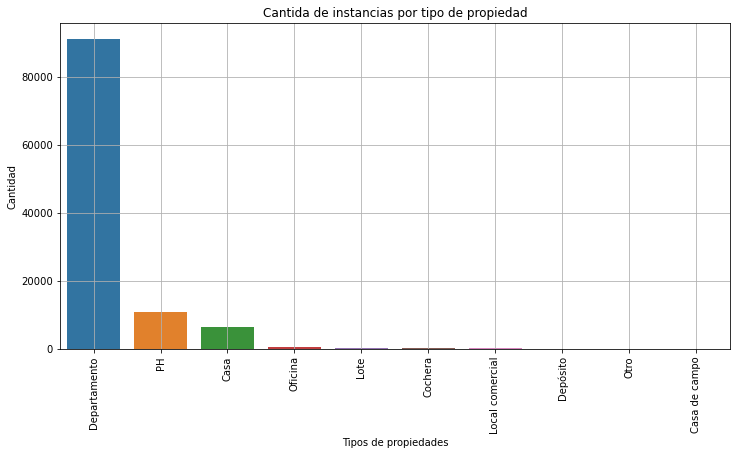

In [4]:
plt.figure(figsize=(12,6))
aux = sns.countplot(data = data, x="property_type", order = data['property_type'].value_counts().index)
locs, labels = plt.xticks() 
aux.set_xticklabels(labels, rotation=90) 
plt.title('Cantida de instancias por tipo de propiedad')
plt.grid()
plt.ylabel('Cantidad')
plt.xlabel('Tipos de propiedades')
plt.show()

> Del gráfico mostrado, se aprecia que existen tres tipos de propiedades más abundante en todo el data set. Se filtraran a los tres tipos de propiedad más importante, esto porque el resto de propiedades no representan una cantidad como para considerarlos relevante (como se hizo en el primer proyecto)

In [292]:
#Filtrado de las propiedas más importantes
data_new= data.property_type.value_counts().to_frame().head(3)
data = pd.DataFrame(data[data.property_type.isin(data_new.index)])


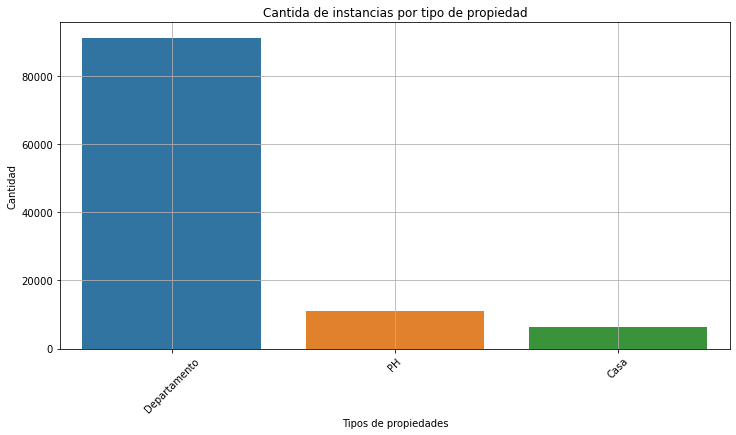

In [293]:
plt.figure(figsize=(12,6))
aux = sns.countplot(data = data, x="property_type", order = data['property_type'].value_counts().index)
locs, labels = plt.xticks() 
aux.set_xticklabels(labels, rotation=45) 
plt.title('Cantida de instancias por tipo de propiedad')
plt.grid()
plt.ylabel('Cantidad')
plt.xlabel('Tipos de propiedades')
plt.show()

> El gráfico muestra todos los tipos de propiedades que quedaron en el data set. A partir de ahora se trabajará solo con estos tipos de propiedadaes.

### Llenado de valores faltantes con ML

In [294]:
data.isna().sum()

l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms              0
surface_total      16427
surface_covered    16682
price                  0
property_type          0
dtype: int64

Ahora, se trabajrá en los valores faltantes para `surface_total` y `surface_covered`. Se construirá modelos simples de ML para hacer predicciones sobre estos valores faltantes. 

Es importantes mencionar que, se toma como estragia primero llenar los valores faltantes para `surface_covered` (SC)  y luego se completarán los valores faltantes para `surface_total` (ST)

También, es importante destacar que para la elección de cualquier modelo de ML se tomará el  `score` que más cerca esté a `1.0` porque esta medición nos indicará que tan preciso es nuestro modelo al hacer la predicción. La misma métrica que se usó para el proyecto 1

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error #Para medir la dimensionalidad del RMSE
from sklearn.metrics import accuracy_score #Para el uso de la métrica de .score
from sklearn.decomposition import PCA # Para la reducción de las dimensionalidades

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve


train_prec = []
test_prec = []
train_RMSE =[]
test_RMSE= []
HP_list = []

train_prec_mean = []
train_prec_std = []

test_prec_mean = []
test_prec_std = []

indice_best = np.zeros(4)

# data_nf = data.dropna()

### Definimos las funciones para hacer el entrenamiento, gráficas y benchmark  de KNeighborsRegressor,  DecisionTreeRegressor y LinearRegression
> Para el modelo `LinearRegression` se está trabajando con atributos polinomicos y el objetivo es encontar el mejor grado para hacer la predicción

> La función `benchmark()` imprmirá resultados como
>> El mejor hipermarametro de acuerdo a los modelos entrenados

>> `RMSE` para train y test

>> `SCORE` para train y test

In [82]:
test_scores_mean[0]

array([0.30859169, 0.38090825, 0.47943002, 0.5231903 , 0.54570609,
       0.56720203, 0.57576059, 0.59962924, 0.6131299 , 0.63015225,
       0.63941754, 0.64152843, 0.62869115, 0.63987513, 0.63688601])

In [113]:
def graficar(i=0, bandera_cv=False):
    '''
    Esta función mostrará los diferentes resultados de las métricas en los modelos entrenados tanto para los valores de test y train
    i> parámetro que se recibe indicando que resultado quieres gráficar, ya se:
        0-> ábol
        1-> knn
        2-> Reg
    '''

    titulos = ['Grafico de ajuste árbol de decision', 'Grafico de K vecinos', 'Gráfico de atributos polinomicos', 'AdaBoost']
    y_label = ['Score', 'RMSE']
    x_label = ['Profundidad de árbol', 'Cantidad de vecinos', 'ATRIBUTOS POLINÓMICOS', 'n_stimators']
    indice_label = ['Depth', 'K', 'Grado', 'n_stimators']



    plt.figure(figsize=(20,9))
    
    if(bandera_cv==True):
        plt.fill_between(HP_list
                 ,train_scores_mean[i,:] - train_scores_std[i,:]
                 ,train_scores_mean[i,:] + train_scores_std[i,:], alpha=0.09
                 ,color="r")

        plt.fill_between(HP_list
                         ,test_scores_mean[i,:] - test_scores_std[i,:]
                         ,test_scores_mean[i,:] + test_scores_std[i,:], alpha=0.09
                         ,color="g")

        plt.plot(HP_list, train_scores_mean[i,:], 'o-', color="r",label="Training score")
        plt.plot(HP_list, test_scores_mean[i,:], 'o-', color="g", label="Test score")
        plt.title(f'{titulos[i]}, validación cruzada')
        plt.legend()
        plt.ylabel(y_label[0])
        plt.xlabel(x_label[i])
        plt.xticks(HP_list)
        
    else:
        plt.subplot(3,1,1)

        plt.plot(HP_list, train_prec[i,:], 'o-', label='train')
        plt.plot(HP_list, test_prec[i,:], 'o-', label='test')


        plt.grid()
        plt.title(titulos[i])
        plt.legend()
        plt.ylabel(y_label[0])
        plt.xlabel(x_label[i])
        plt.xticks(HP_list)
        indice_max = np.argmax(test_prec[i,:])

        plt.annotate(
            f"test_Score:({round(test_prec[i, indice_max],3)}, con {indice_label[i]}: {indice_max+1})\n"
            + f"train_Score:({round(train_prec[i, indice_max],3)})"
            ,xy=(indice_max+1, test_prec[i, indice_max])
            ,xytext=(indice_max, test_prec[i, indice_max]-(test_prec[i, indice_max]*0.15))
            ,size=11
            ,va="center"
            ,ha="center"
            ,color='white'
            ,bbox=dict(boxstyle="round4", fc="black")
            ,arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",fc="black"), 
             )

        
        plt.subplot(3,1,3)
        
        plt.plot(HP_list, train_RMSE[i,:], 'o-', label='train')
        plt.plot(HP_list, test_RMSE[i,:], 'o-', label='test')


        plt.grid()
        plt.title(titulos[i])
        plt.legend()
        plt.ylabel(y_label[1])
        plt.xlabel(x_label[i])
        plt.xticks(HP_list)

        plt.annotate(
            f"test_RMSE:({round(test_RMSE[i, indice_max],3)}, con {indice_label[i]}: {indice_max+1})\n"
            + f"train_RMSE:({round(train_RMSE[i, indice_max],3)})"
            ,xy=(indice_max+1, test_RMSE[i, indice_max])
            ,xytext=(indice_max, test_RMSE[i, indice_max]*1.15)
            ,size=11
            ,va="center"
            ,ha="center"
            ,color='white'
            ,bbox=dict(boxstyle="round4", fc="black")
            ,arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",fc="black"), 
             )

    plt.show()    



In [100]:
 #Estas funciones serán rehusadas más adelante
#Entrenamiento de los modelos KNN y Árbol
def entrenamiento(fin=5, bandera_arbol=False, bandera_knn=False, bandera_reg=False, bandera_AdaBoost=False, n_Ada=25, n_AdaDepth=1, Ada_learning_rate=0.1, bandera_cv=False, k_CV=5):
    '''
    Esta función entrenará los modelos DecisionTreeRegressor,  KNeighborsRegressor  y LinearRegression
    y se guardarán los resultados de: .score y RMSE.
    
    fin -> Parámetro para entrenar el modelo DecisionTreeRegressor desde 1 hasta fin como Depth
        y también será utilizado para KNeighborsRegressor desde 1 hasta fin como n_neighbors
    '''
    #Vaciamos las listas
    arbol_train_prec =  []
    arbol_test_prec = []
    arbol_train_RMSE =[]
    arbol_test_RMSE= []
    arbol_train_scores_mean=[]
    arbol_train_scores_std=[]
    arbol_test_scores_mean = []
    arbol_test_scores_std = []
    
    
    knn_train_prec =  []
    knn_test_prec = []
    knn_train_RMSE=[]
    knn_test_RMSE=[]
    knn_train_scores_mean=[]
    knn_train_scores_std=[]
    knn_test_scores_mean = []
    knn_test_scores_std = []    
    
    reg_train_prec =  []
    reg_test_prec = []
    reg_train_RMSE=[]
    reg_test_RMSE=[]
    reg_train_scores_mean=[]
    reg_train_scores_std=[]
    reg_test_scores_mean = []
    reg_test_scores_std = []    
    
    AdaBoost_train_prec =  []
    AdaBoost_test_prec = []
    AdaBoost_train_RMSE =[]
    AdaBoost_test_RMSE= []
 
    HP_list[:]=[]
    
    global train_prec, test_prec , train_RMSE, test_RMSE, indice_best
    global train_scores_mean, train_scores_std, test_scores_mean, test_scores_std
    global arbol_modelo,knn_modelo, linear_model, AdaBoost_modelo
    
#     if (bandera_AdaBoost==True):
#         fin=2
    
    if(bandera_AdaBoost==True):
            arbol_modelo = DecisionTreeRegressor(criterion ='friedman_mse'
                                          ,max_depth=n_AdaDepth
                                          ,max_features='auto'
                                          ,splitter='best')
            AdaBoost_modelo = AdaBoostRegressor(arbol_modelo
                                                ,n_estimators=n_Ada
                                                ,learning_rate=Ada_learning_rate
                                                ,random_state=42).fit(X_train, y_train)
            y_train_pred = AdaBoost_modelo.predict(X_train)
            y_test_pred  = AdaBoost_modelo.predict(X_test)
            
            AdaBoost_train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            AdaBoost_test_RMSE.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
            AdaBoost_train_prec.append(AdaBoost_modelo.score(X_train, y_train))
            AdaBoost_test_prec.append(AdaBoost_modelo.score(X_test, y_test))
            
        
    
    for hp in np.arange(1,fin+1):
        HP_list.append(hp)
        
        if (bandera_arbol==True):
            arbol_modelo = DecisionTreeRegressor(criterion ='friedman_mse'
                                          ,max_depth=hp
                                          ,max_features='auto'
                                          ,splitter='best').fit(X_train, y_train)
 
            if(bandera_cv==True):
                arbol_scores = cross_validate(arbol_modelo, X, y, cv=k_CV, return_train_score=True, n_jobs = -1)
                arbol_train_scores_mean.append(arbol_scores['train_score'].mean())
                arbol_train_scores_std.append(arbol_scores['train_score'].std())
                
                arbol_test_scores_mean.append(arbol_scores['test_score'].mean())
                arbol_test_scores_std.append(arbol_scores['test_score'].std())
                #Fin bandera_cv
                
                
            y_train_pred = arbol_modelo.predict(X_train)
            y_test_pred = arbol_modelo.predict(X_test)
 
            arbol_train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            arbol_test_RMSE.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
            arbol_train_prec.append(arbol_modelo.score(X_train, y_train))
            arbol_test_prec.append(arbol_modelo.score(X_test, y_test))
 
        if (bandera_knn==True):
        #Vecinos
            knn_modelo = KNeighborsRegressor(n_neighbors=hp).fit(X_train, y_train)
            
            if(bandera_cv==True):
                knn_scores = cross_validate(knn_modelo, X, y, cv=k_CV, return_train_score=True, n_jobs = -1)
                knn_train_scores_mean.append(knn_scores['train_score'].mean())
                knn_train_scores_std.append(knn_scores['train_score'].std())
                
                knn_test_scores_mean.append(knn_scores['test_score'].mean())
                knn_test_scores_std.append(knn_scores['test_score'].std())
                #Fin bandera_cv
            
            
            y_train_pred = knn_modelo.predict(X_train)
            y_test_pred = knn_modelo.predict(X_test)
 
            knn_train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            knn_test_RMSE.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
 
            knn_train_prec.append(knn_modelo.score(X_train, y_train))
            knn_test_prec.append(knn_modelo.score(X_test, y_test))  
        
        if (bandera_reg==True):
            X_aux = X.reshape(-1,X.shape[1])
            for potencia in range(2,hp+1):
                X_aux = np.hstack((X_aux,(X**potencia).reshape(-1,X.shape[1])))
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X_aux, y, test_size=0.30, random_state=42)
            
            linear_model = LinearRegression().fit(X_train_aux,y_train_aux)
            
            if(bandera_cv==True):
                reg_scores = cross_validate(linear_model, X, y, cv=k_CV, return_train_score=True, n_jobs = -1)
                reg_train_scores_mean.append(reg_scores['train_score'].mean())
                reg_train_scores_std.append(reg_scores['train_score'].std())
                
                reg_test_scores_mean.append(reg_scores['test_score'].mean())
                reg_test_scores_std.append(reg_scores['test_score'].std())
                #Fin bandera_cv
           
            
            
            y_train_pred = linear_model.predict(X_train_aux)
            y_test_pred = linear_model.predict(X_test_aux)
            
            reg_train_RMSE.append(np.sqrt(mean_squared_error(y_train_aux, y_train_pred)))
            reg_test_RMSE.append(np.sqrt(mean_squared_error(y_test_aux, y_test_pred)))
            reg_train_prec.append(linear_model.score(X_train_aux, y_train_aux))
            reg_test_prec.append(linear_model.score(X_test_aux, y_test_aux))
        
        #Fin for
        if (bandera_arbol==False):
            arbol_train_prec = [0]* len (HP_list)
            arbol_test_prec = [0]* len (HP_list)
            arbol_train_RMSE = [0]* len (HP_list)
            arbol_test_RMSE =  [0]* len (HP_list)
            
            arbol_train_scores_mean= [0]* len (HP_list)
            arbol_train_scores_std = [0]* len (HP_list)
            arbol_test_scores_mean = [0]* len (HP_list)
            arbol_test_scores_std  = [0]* len (HP_list)
        
        
        if (bandera_knn==False):
            knn_train_prec =  [0]* len (HP_list)
            knn_test_prec =  [0]* len (HP_list)
            knn_train_RMSE =  [0]* len (HP_list)
            knn_test_RMSE =  [0]* len (HP_list)
            
            knn_train_scores_mean	= [0]* len (HP_list)
            knn_train_scores_std    = [0]* len (HP_list)
            knn_test_scores_mean    = [0]* len (HP_list)
            knn_test_scores_std     = [0]* len (HP_list)
        
        
        if (bandera_reg==False):
            reg_train_prec =  [0]* len (HP_list)
            reg_test_prec =  [0]* len (HP_list)
            reg_train_RMSE =  [0]* len (HP_list)
            reg_test_RMSE =  [0]* len (HP_list)
            
            reg_train_scores_mean	= [0]* len (HP_list)
            reg_train_scores_std    = [0]* len (HP_list)
            reg_test_scores_mean    = [0]* len (HP_list)
            reg_test_scores_std     = [0]* len (HP_list)
        
        if (bandera_AdaBoost==False):
            AdaBoost_train_prec = [0]* len (HP_list)
            AdaBoost_test_prec  = [0]* len (HP_list)
            AdaBoost_train_RMSE = [0]* len (HP_list)
            AdaBoost_test_RMSE  = [0]* len (HP_list)
            
            train_prec = np.array((arbol_train_prec, knn_train_prec, reg_train_prec, AdaBoost_train_prec))
            test_prec  = np.array((arbol_test_prec, knn_test_prec, reg_test_prec, AdaBoost_test_prec))
 
            train_RMSE = np.array((arbol_train_RMSE, knn_train_RMSE, reg_train_RMSE, AdaBoost_train_RMSE))
            test_RMSE  = np.array((arbol_test_RMSE, knn_test_RMSE, reg_test_RMSE, AdaBoost_test_RMSE))
    
    
    
        if (bandera_AdaBoost==True):
            train_prec = np.array((arbol_train_prec, knn_train_prec, reg_train_prec, AdaBoost_train_prec *len(HP_list)))
            test_prec  = np.array((arbol_test_prec, knn_test_prec, reg_test_prec, AdaBoost_test_prec *len(HP_list)))

            train_RMSE = np.array((arbol_train_RMSE, knn_train_RMSE, reg_train_RMSE, AdaBoost_train_RMSE*len(HP_list)))
            test_RMSE  = np.array((arbol_test_RMSE, knn_test_RMSE, reg_test_RMSE, AdaBoost_test_RMSE*len(HP_list)))
    
    if(bandera_cv==True):
        train_scores_mean = np.array((arbol_train_scores_mean,	knn_train_scores_mean, reg_train_scores_mean))
        train_scores_std =  np.array((arbol_train_scores_std,	knn_train_scores_std, reg_train_scores_std))
        test_scores_mean =  np.array((arbol_test_scores_mean,	knn_test_scores_mean, reg_test_scores_mean))
        test_scores_std =   np.array((arbol_test_scores_std	,	knn_test_scores_std,  reg_test_scores_std))
        
        
    
    indice_best = [np.argmax(test_prec[0,:])+1,  np.argmax(test_prec[1,:])+1, np.argmax(test_prec[2,:])+1,  np.argmax(test_prec[3,:])+1] 
    
    
    arbol_modelo = DecisionTreeRegressor(criterion ='friedman_mse'
                                      ,max_depth=(indice_best[0])
                                      ,max_features='auto'
                                      ,splitter='best').fit(X_train, y_train)
    
    knn_modelo = KNeighborsRegressor(n_neighbors=indice_best[1]).fit(X_train, y_train)
    
    X_aux = X.reshape(-1,X.shape[1])
    X_aux = np.hstack((X_aux,(X**indice_best[2]).reshape(-1,X.shape[1])))
    X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X_aux, y, test_size=0.30, random_state=42)
    linear_model = LinearRegression().fit(X_train_aux,y_train_aux)

In [6]:
def benchmark(bandera_cv=False):
    '''
    Imprimirá en pantalla los resultados solo en texto con los diferentes resultados de las métricas aplicadas a los modelos
    '''
    modelos = ['Árbol Regressor', 'KNN Regressor','Regresión lineal', 'AdaBoost']
    indice_label = ['Depth', 'K','Grado', '??']
    
    for i, model in enumerate([arbol_modelo, knn_modelo, linear_model, AdaBoost_modelo]):
        print(f'Modelo: {modelos[i]} con {indice_label[i]}={indice_best[i]}')
        if (bandera_cv==False):
            print(f' >Raíz del error cuadrático medio en Train: {round(train_RMSE[i, indice_best[i]-1],3)}')
            print(f' >Raíz del error cuadrático medio en Test: {round(test_RMSE[i, indice_best[i]-1],3)}\n')

            print(f' >Score del modelo en Train: {round(train_prec[i, indice_best[i]-1],3)}')
            print(f' >Score del modelo en Test: {round(test_prec[i, indice_best[i]-1],3)}\n') 
        else:
            if(i==0):
                print('**Resultados de la validación cruzada**\n')
            if(i!=3):
                print(f' >Promedio de Score para train: {round(train_scores_mean[i, indice_best[i]-1],3)}')
                print(f' >Desviación estándar de Score para train: {round(train_scores_std[i, indice_best[i]-1],3)}\n')	

                print(f' >Promedio de Score para test: {round(test_scores_mean[i, indice_best[i]-1],3)}')	
                print(f' >Desviación estándar de Score para test: {round(test_scores_std[i, indice_best[i]-1],3)}\n')


Sabemos que no todas las columnas son númericas. Veremos las columnas faltantes para ver su tipo

In [281]:
print(data.dtypes)

l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
property_type       object
dtype: object


> Se evidencia que aún existen columnas no númericas para el dataframe, lo que nos lleva a hacer `get_dummies()` a las columnas no númericas y luego se aplicará la reducción de dimensionalidad puesto que al aplicar el encoding se generarán más de 100 columnas. 

#Encoding

In [295]:
#Encoding
for col in ['l2','property_type','l3']:
    data[col] = data[col].astype('category')    
data = pd.get_dummies(data=data,columns=['l2','property_type','l3'])    

In [296]:
data.shape

(108806, 102)

> El Encoding no dejó un dataset muy enorme. En las siguientes celdas se intentará hacer reducción de dimensionalidad para poder trabajar más eficientemente

## Escogiendo el número de componentes PCA
Una parte vital del uso de PCA en la práctica es la capacidad de estimar cuántos componentes
son necesarios para describir los datos. Podemos determinar esto mirando el acumulado
Razón de varianza explicada en función del número de componentes

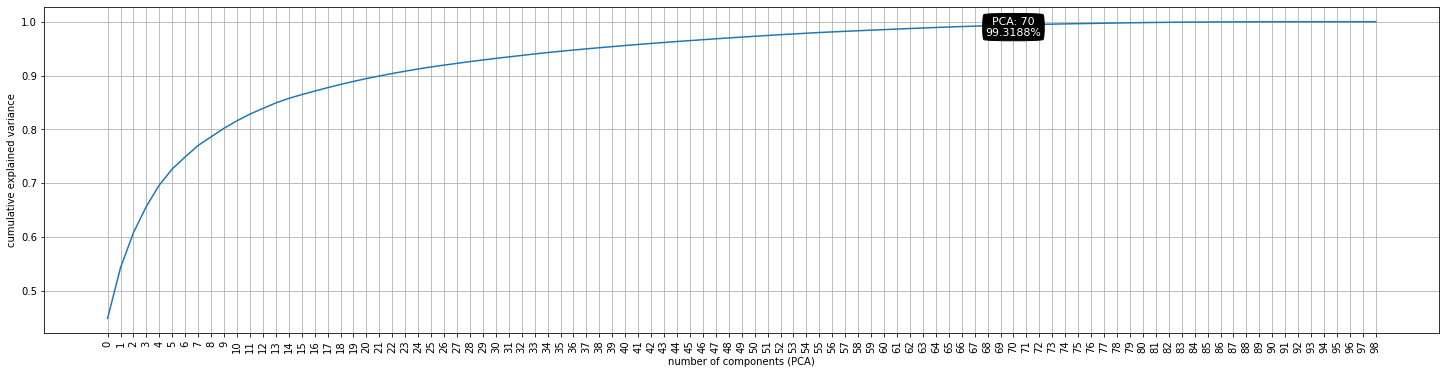

In [297]:
pca = PCA().fit(data.drop(columns=['surface_total','surface_covered','price']))

aux_PCA = np.cumsum(pca.explained_variance_ratio_)

#Escogeremos un número óptimo para la reducción de dimensionalidad. Veremos que tanta varianza acumulada
hit = 70


plt.figure(figsize=(25,6))


plt.plot(aux_PCA)
plt.xlabel('number of components (PCA)')
plt.xticks(np.arange(0,99), rotation=90)
plt.ylabel('cumulative explained variance');
plt.grid()

plt.annotate(f"PCA: {hit}\n"
             +f"{round(aux_PCA[hit-1]*100,4)}%"
        ,xy=(hit, aux_PCA[hit-1])
        ,xytext=(hit, 0.99)
        ,size=11
        ,va="center"
        ,ha="center"
        ,color='white'
        ,bbox=dict(boxstyle="round4", fc="black")
        ,arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",fc="black"), 
         )


plt.show()

> Esta curva cuantifica qué parte de la varianza total de 99 dimensiones (no se está tomando en cuenta las varibles `surface_total`, `surface_covered`,`price`) está contenida dentro de los primeros N componentes. Por ejemplo, vemos que con este dataset se escogerá el número de componente 70 ya que este contiene más del 99% de la varianza acumulada

> Ahora, procederemos a llenar los valores faltantes de `surface_covered` con el PCA indicado, pero antes entrenaremos modelos de árbol, knn y regresión polinómica para buscar quien tene un mejor desempeño

In [305]:
len(test_prec[3])

9

In [313]:
%%time
data_nf = data.dropna()
X =  np.array(data_nf.drop(columns=['surface_total','surface_covered']))
y = np.array(data_nf.surface_covered)
X_nuevo = PCA(n_components = hit).fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.30, random_state=42)
entrenamiento(15,bandera_arbol=True, bandera_knn=True, bandera_reg=True)


Wall time: 5min 37s


In [314]:
benchmark()

Modelo: Árbol Regressor con Depth=13
 >Raíz del error cuadrático medio en Train: 8.616
 >Raíz del error cuadrático medio en Test: 11.633

 >Score del modelo en Train: 0.881
 >Score del modelo en Test: 0.781

Modelo: KNN Regressor con K=6
 >Raíz del error cuadrático medio en Train: 10.187
 >Raíz del error cuadrático medio en Test: 12.062

 >Score del modelo en Train: 0.833
 >Score del modelo en Test: 0.765

Modelo: Regresión lineal con Grado=2
 >Raíz del error cuadrático medio en Train: 11.681
 >Raíz del error cuadrático medio en Test: 11.837

 >Score del modelo en Train: 0.781
 >Score del modelo en Test: 0.774

Modelo: AdaBoost con n_stimators=1
 >Raíz del error cuadrático medio en Train: 0.0
 >Raíz del error cuadrático medio en Test: 0.0

 >Score del modelo en Train: 0.0
 >Score del modelo en Test: 0.0



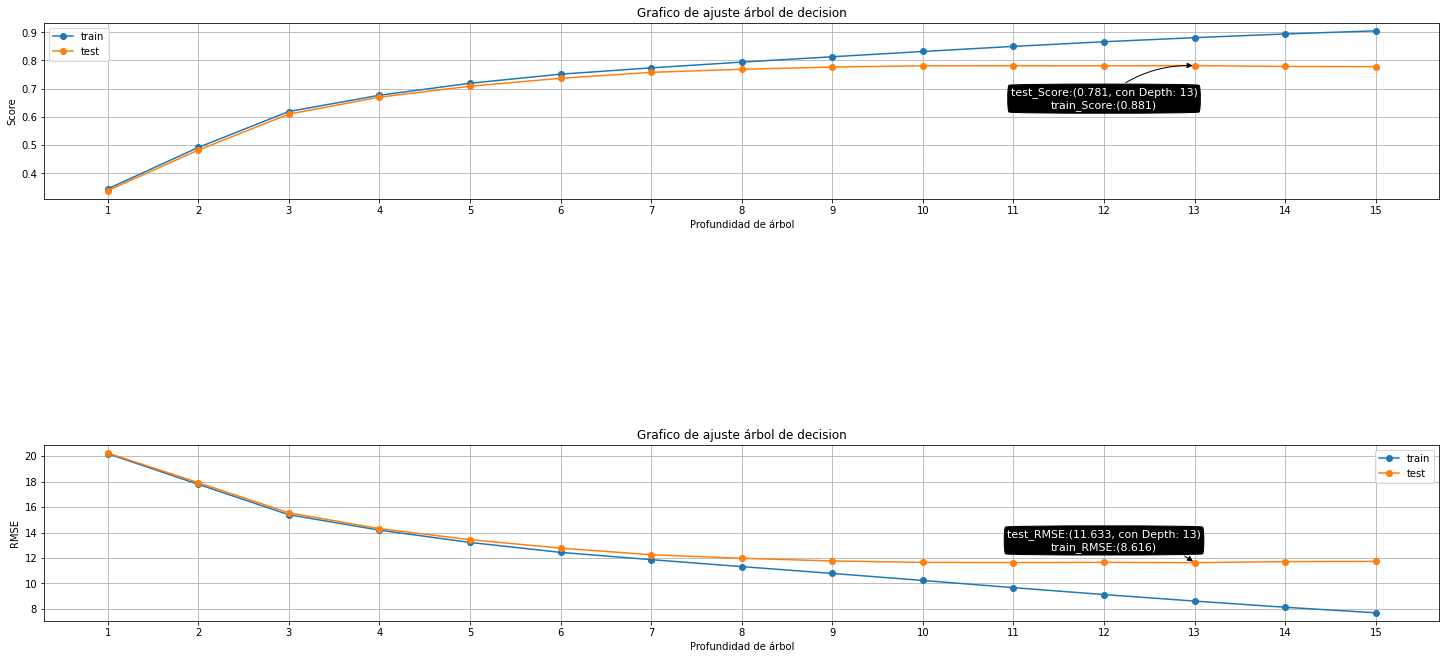

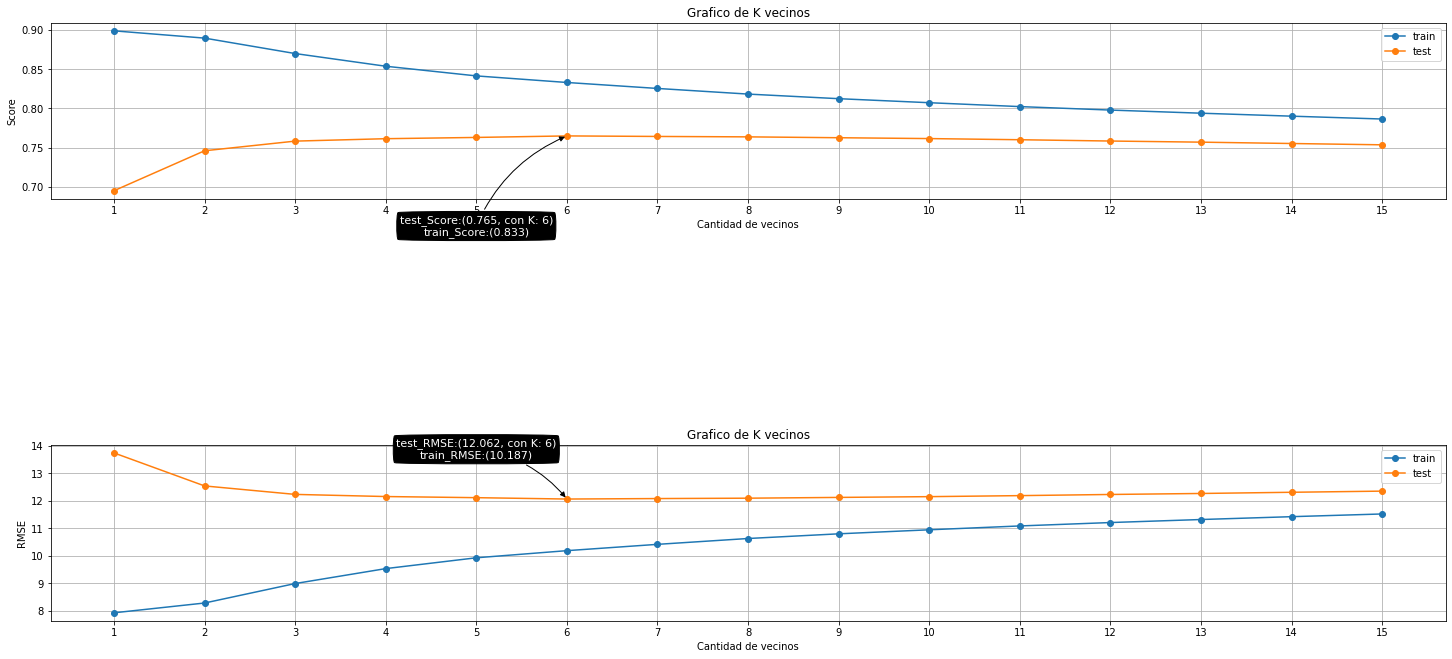

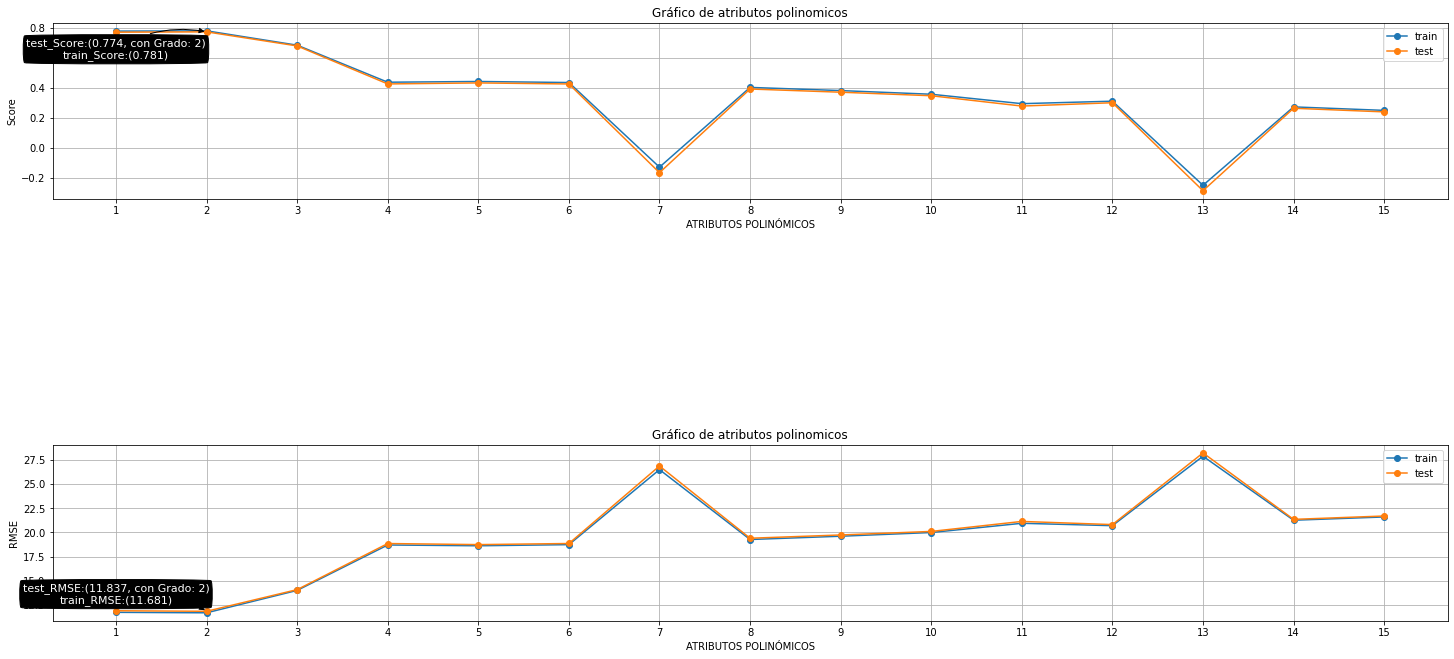

In [315]:
for i in range(0,3):
    graficar(i)
    print('\n\n')

> Árbol es el mejor modelo porque tiene un desempeño óptimo para hacer la predicción de los valores faltantes según la métrica `score`, procederemos a usar este modelo para el llenado de la columna `surface_covered`

Las siguientes líneas harán el llenado de los valores faltantes con la predicción del modelok de ML

In [316]:
%%time
data_aux = data[(data.surface_covered.isna())]

X_data = data_aux.drop(columns=['surface_total','surface_covered'])
X_data = PCA(n_components =hit).fit_transform(X_data) 
y_data = arbol_modelo.fit(X_nuevo, y).predict(X_data)

data_aux['surface_covered'] = y_data
data = data.drop(data_aux.index)
data = data.append(data_aux, ignore_index=True)

Wall time: 5.03 s


> Ahora, haremos lo mismo para predicir la variable `surface_total`. Pero, primero veamos el número optimo de componentes adecuado

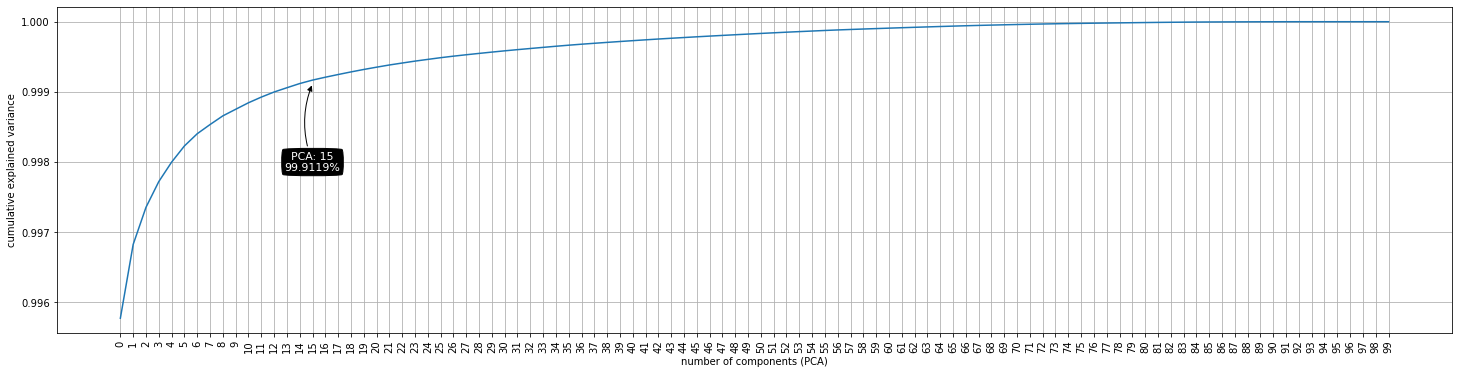

In [317]:
pca = PCA().fit(data.drop(columns=['surface_total','price']))
# pca = PCA().fit(data.drop(columns='price'))
aux_PCA = np.cumsum(pca.explained_variance_ratio_)
hit = 15


plt.figure(figsize=(25,6))


plt.plot(aux_PCA)
plt.xlabel('number of components (PCA)')
plt.xticks(np.arange(0,100), rotation=90)
plt.ylabel('cumulative explained variance');
plt.grid()

plt.annotate(f"PCA: {hit}\n"
             +f"{round(aux_PCA[hit-1]*100,4)}%"
        ,xy=(hit, aux_PCA[hit-1])
        ,xytext=(hit, 0.998)
        ,size=11
        ,va="center"
        ,ha="center"
        ,color='white'
        ,bbox=dict(boxstyle="round4", fc="black")
        ,arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",fc="black"), 
         )


plt.show()

> Escogeremos 15 componentes ya que estos representan más del `99.91%` de la varianza acumulada

>Luego, veremos qué modelo hace una mejor predicción

In [318]:
%%time
data_nf = data.dropna()
X = np.array(data_nf.drop(columns=['surface_total']))
y = np.array(data_nf.surface_total) 

X_nuevo = PCA(n_components = hit).fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

entrenamiento(15,bandera_arbol=True, bandera_knn=True, bandera_reg=True)


Wall time: 2min 45s


In [319]:
benchmark()

Modelo: Árbol Regressor con Depth=10
 >Raíz del error cuadrático medio en Train: 11.733
 >Raíz del error cuadrático medio en Test: 13.992

 >Score del modelo en Train: 0.869
 >Score del modelo en Test: 0.813

Modelo: KNN Regressor con K=3
 >Raíz del error cuadrático medio en Train: 10.291
 >Raíz del error cuadrático medio en Test: 14.923

 >Score del modelo en Train: 0.899
 >Score del modelo en Test: 0.787

Modelo: Regresión lineal con Grado=2
 >Raíz del error cuadrático medio en Train: 14.084
 >Raíz del error cuadrático medio en Test: 14.027

 >Score del modelo en Train: 0.811
 >Score del modelo en Test: 0.812

Modelo: AdaBoost con n_stimators=1
 >Raíz del error cuadrático medio en Train: 0.0
 >Raíz del error cuadrático medio en Test: 0.0

 >Score del modelo en Train: 0.0
 >Score del modelo en Test: 0.0



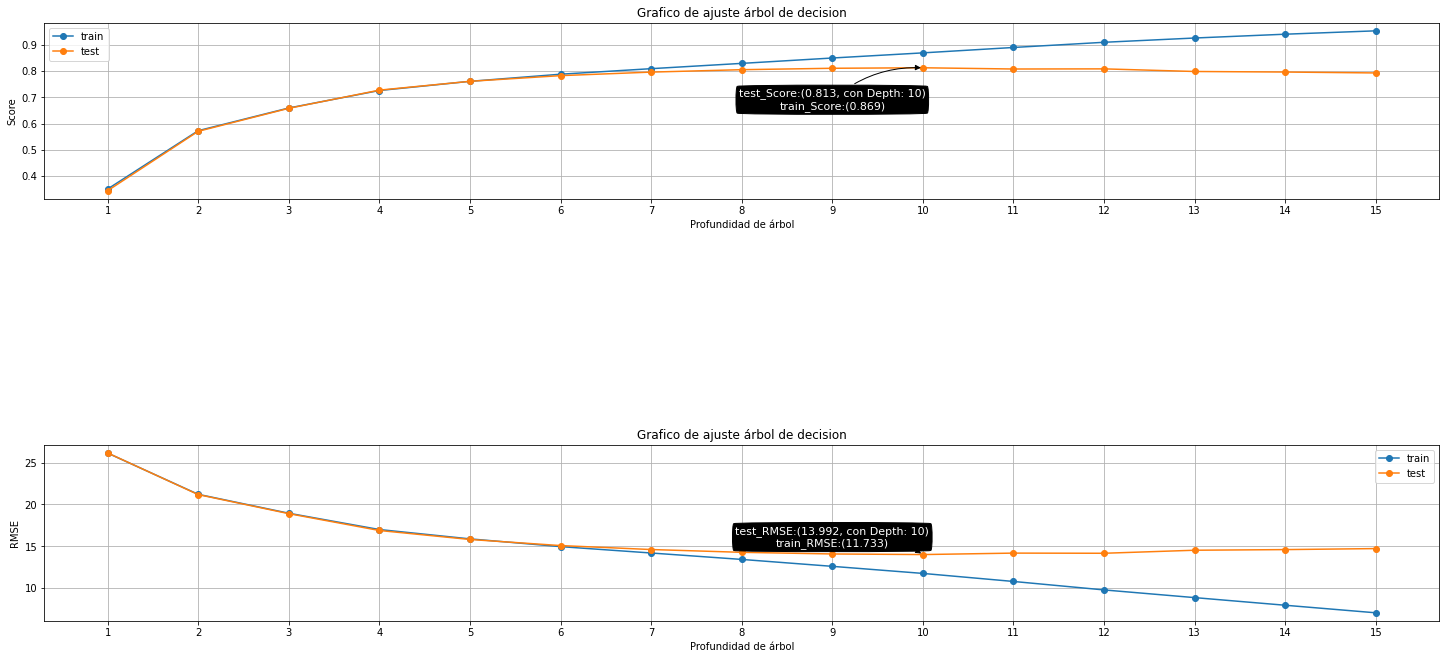

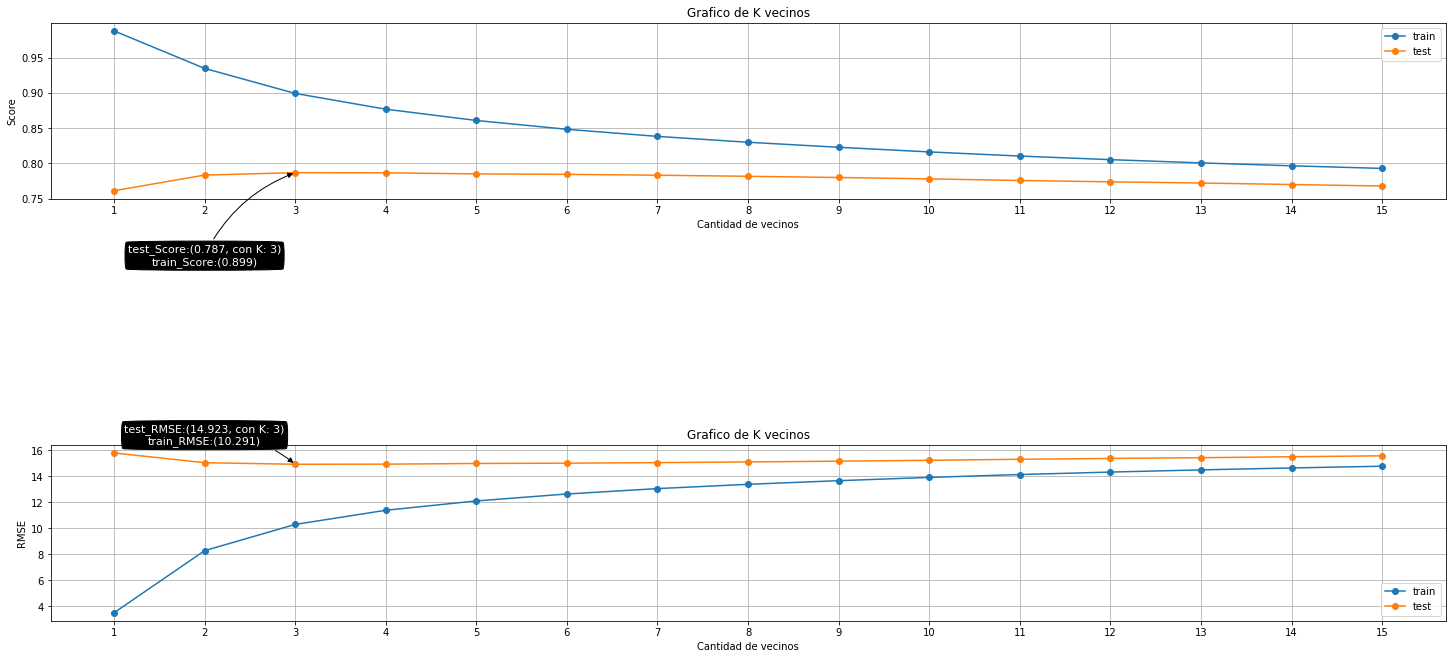

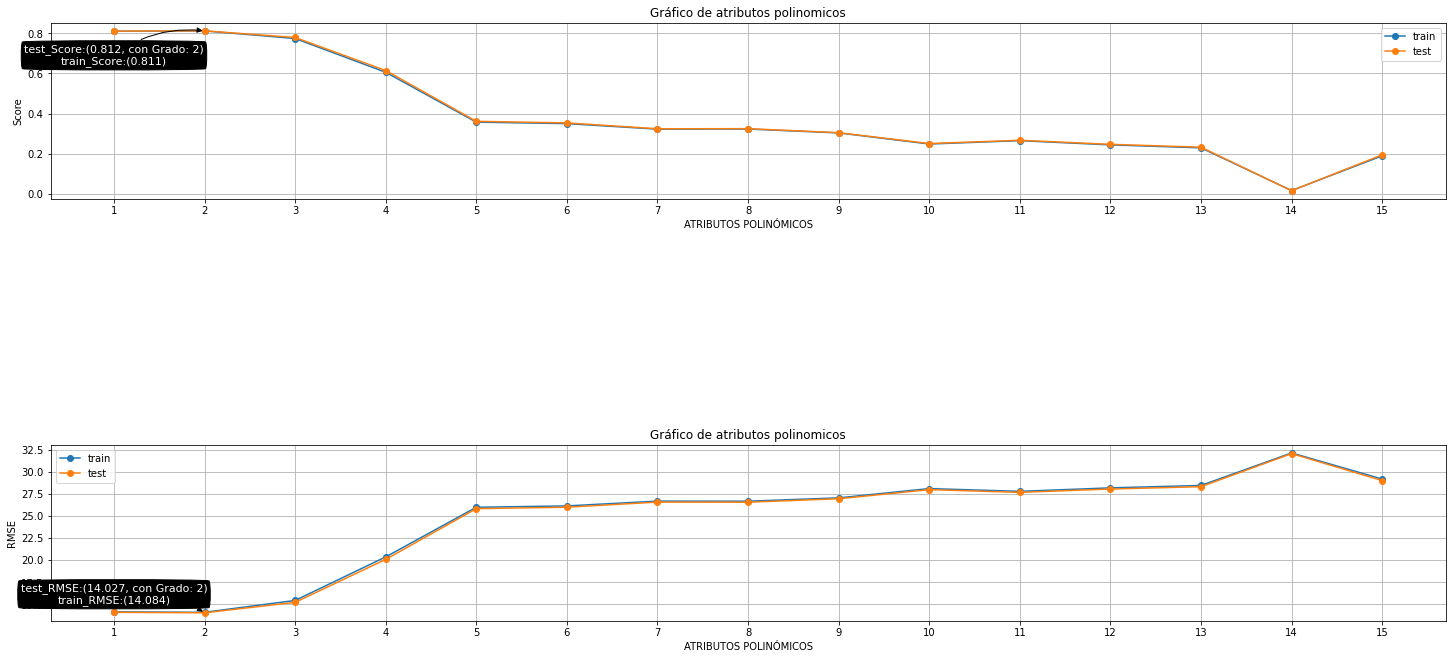

In [320]:
for i in range(0,3):
    graficar(i)
    print('\n\n')

> Árbol es el mejor modelo porque tiene un desempeño óptimo para hacer la predicción de los valores faltantes según la métrica `score`, procederemos a usar este modelo para el llenado de la columna `surface_total`

Procedemos con el rellenado de valores faltantes para la columna `surface_total`

In [321]:
%%time
data_aux = data[(data.surface_total.isna())]
X_data = data_aux.drop(columns=['surface_total'])
X_data = PCA(n_components = hit).fit_transform(X_data) 
y_data = arbol_modelo.fit(X_nuevo, y).predict(X_data)

data_aux['surface_total'] = y_data
data = data.drop(data_aux.index)
data = data.append(data_aux, ignore_index=True)

Wall time: 1.24 s


In [322]:
data.isna().sum()

rooms                  0
bedrooms               0
bathrooms              0
surface_total          0
surface_covered        0
                      ..
l3_Villa Riachuelo     0
l3_Villa Santa Rita    0
l3_Villa Soldati       0
l3_Villa Urquiza       0
l3_Villa del Parque    0
Length: 102, dtype: int64

Se ha completado el rellenado de valores faltantes con un modelo de ML

# Parte B
# Modelo de ML para hacer una predicción de la variable `price`

Partimos de con un data set sin valores faltantes y aplicaremos la reducción de dimensionalidad para empezar a trabajar con los modelos predictorios para la variable `price`

In [332]:
data.shape

(108806, 102)

In [324]:
data.to_csv('data_nf.csv')

> De las 102 columnas del dataset actual, se hará la reducción al menor tamaño posible

In [331]:
data = pd.read_csv('data_nf.csv').drop(columns='Unnamed: 0')

### Buscamos el PCA optimo

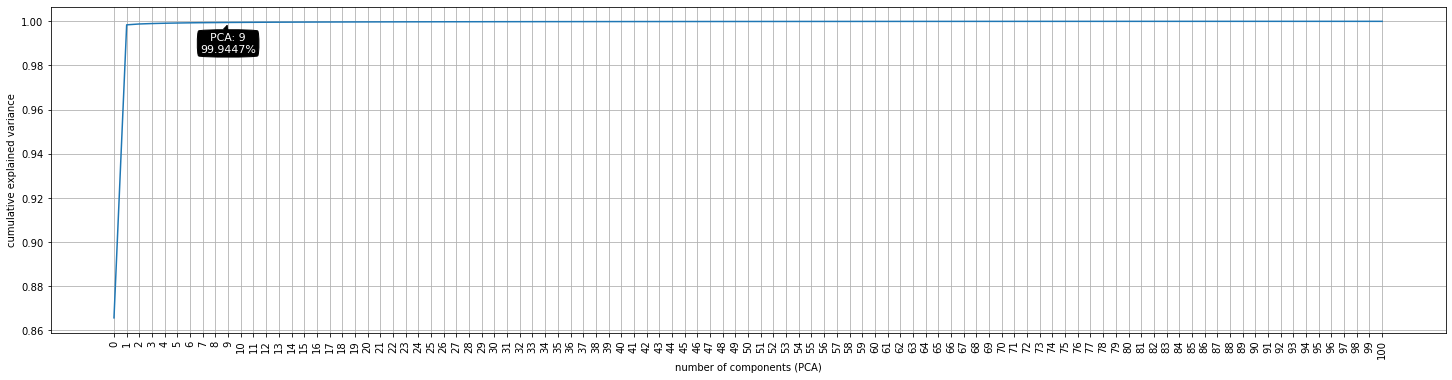

In [334]:
pca = PCA().fit(data.drop(columns='price'))
aux_PCA = np.cumsum(pca.explained_variance_ratio_)
hit = 9

plt.figure(figsize=(25,6))


plt.plot(aux_PCA)
plt.xlabel('number of components (PCA)')
plt.xticks(np.arange(0,101), rotation=90)
plt.ylabel('cumulative explained variance');
plt.grid()

plt.annotate(f"PCA: {hit}\n"
             +f"{round(aux_PCA[hit-1]*100,4)}%"
        ,xy=(hit, aux_PCA[hit-1])
        ,xytext=(hit, 0.99)
        ,size=11
        ,va="center"
        ,ha="center"
        ,color='white'
        ,bbox=dict(boxstyle="round4", fc="black")
        ,arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",fc="black"), 
         )




# plt.savefig("PCA_RANGO.PNG")
plt.show()

> Vemos que con este dataset se escogerá el número de componente 9 ya que este número se obtiene un `99.9454%` de la varianza acumulada. También es importante destacar que con un número menor de dimensiones los modelos tienen menor coste computacional

La reducción de dimensionalidad será trabajado de ahora en adelante en un dataset nuevo llamado `data_2` esto con el próposito de liberar memoria RAM y en caso el kernel sea reniciado empezar desde este punto

In [335]:
## hit -> representa el número escogido de PCA aplicado al data_set

X = np.array(data.drop(columns=['price']))
y = np.array(data.price)
X_nuevo = PCA(n_components = hit).fit_transform(X) 
columnas = []
for i in range(0,X_nuevo.shape[1]):
    columnas.append(f'V{i}')
data_2 = pd.DataFrame(data = X_nuevo, columns=columnas)
data_2['price'] =  np.array(data.price)
data_2.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,price
0,-5.530697,2.045095,-0.576689,-0.184351,-0.199160,1.131291,-1.001173,0.209474,-0.114966,159000.0
1,-33.454386,-1.739400,-0.107237,-0.156526,-0.835165,0.629902,-0.855299,0.374525,0.845165,125000.0
2,2.112450,17.230399,-0.409152,-0.318132,-0.879481,0.498852,-0.779005,0.320904,0.839501,295000.0
3,-35.124739,9.309897,0.064204,1.075505,-0.877460,0.849558,-0.193806,0.317585,-0.149071,40000.0
4,-18.131017,-4.383853,-0.521544,-0.187356,-0.920330,0.545234,-0.830828,0.333852,-0.219572,150000.0


In [336]:
#Guardaamos nuestro dataset reducido
data_2.to_csv('data_final.csv')

In [7]:
data_2 =  pd.read_csv('data_final.csv').drop(columns='Unnamed: 0')
data_2.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,price
0,-5.530697,2.045095,-0.576689,-0.184351,-0.199160,1.131291,-1.001173,0.209474,-0.114966,159000.0
1,-33.454386,-1.739400,-0.107237,-0.156526,-0.835165,0.629902,-0.855299,0.374525,0.845165,125000.0
2,2.112450,17.230399,-0.409152,-0.318132,-0.879481,0.498852,-0.779005,0.320904,0.839501,295000.0
3,-35.124739,9.309897,0.064204,1.075505,-0.877460,0.849558,-0.193806,0.317585,-0.149071,40000.0
4,-18.131017,-4.383853,-0.521544,-0.187356,-0.920330,0.545234,-0.830828,0.333852,-0.219572,150000.0


Empezamos con las predicciones, se entrenará los modelos descritos y se buscará el mejor `SCORE` de cada modelo para tomarlo como modelo final

In [11]:
X = np.array(data_2.drop(columns='price'))
y = np.array(data_2.price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [15]:
%%time
entrenamiento(16,bandera_arbol=True, bandera_knn=True,bandera_reg=True)
benchmark()

Modelo: Árbol Regressor con Depth=16
 >Raíz del error cuadrático medio en Train: 26174.438
 >Raíz del error cuadrático medio en Test: 37748.16

 >Score del modelo en Train: 0.892
 >Score del modelo en Test: 0.775

Modelo: KNN Regressor con K=2
 >Raíz del error cuadrático medio en Train: 23791.155
 >Raíz del error cuadrático medio en Test: 40424.734

 >Score del modelo en Train: 0.911
 >Score del modelo en Test: 0.743

Modelo: Regresión lineal con Grado=6
 >Raíz del error cuadrático medio en Train: 47709.389
 >Raíz del error cuadrático medio en Test: 47664.478

 >Score del modelo en Train: 0.642
 >Score del modelo en Test: 0.642

Wall time: 1min 13s


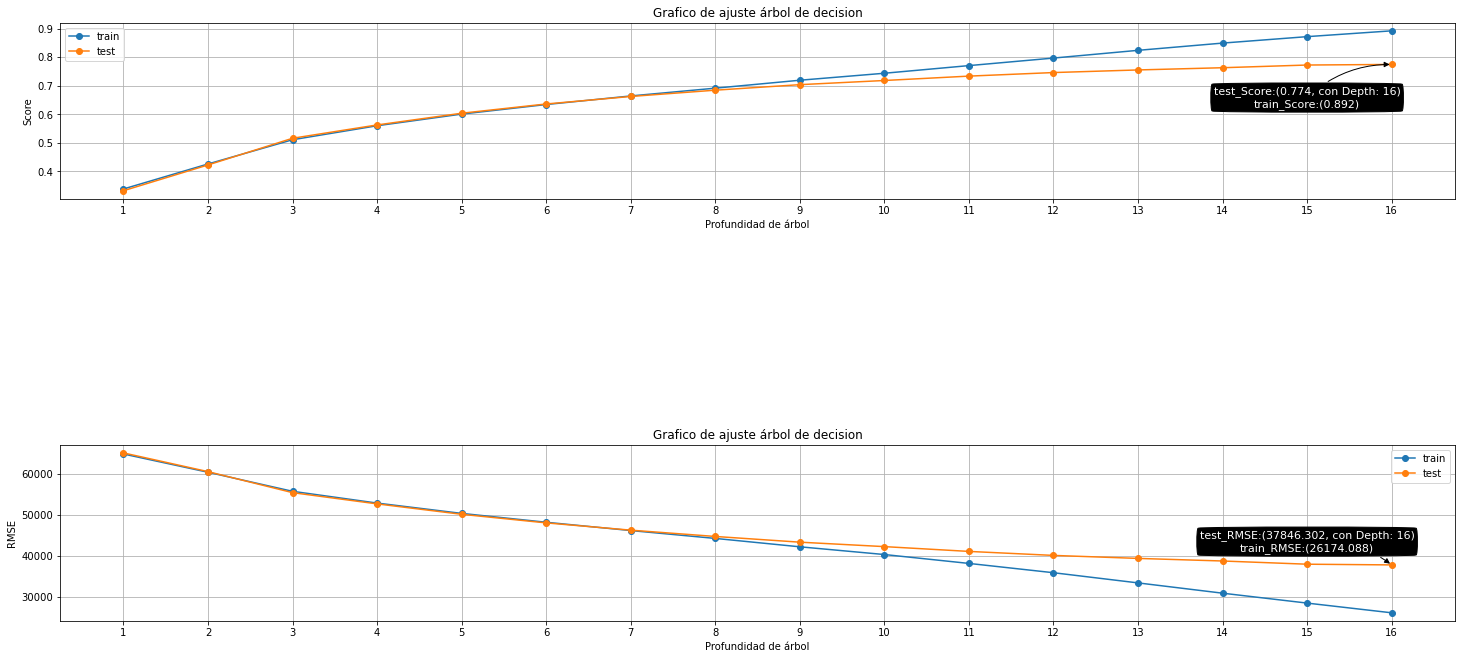

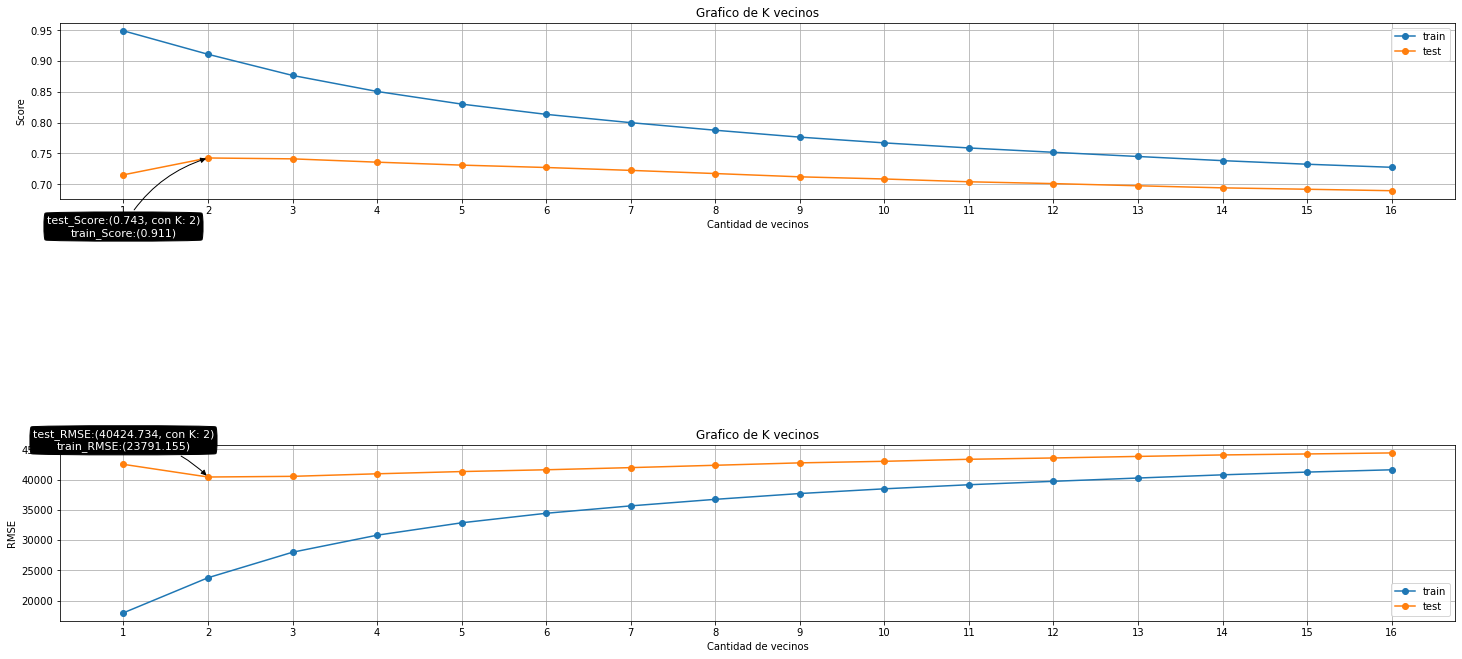

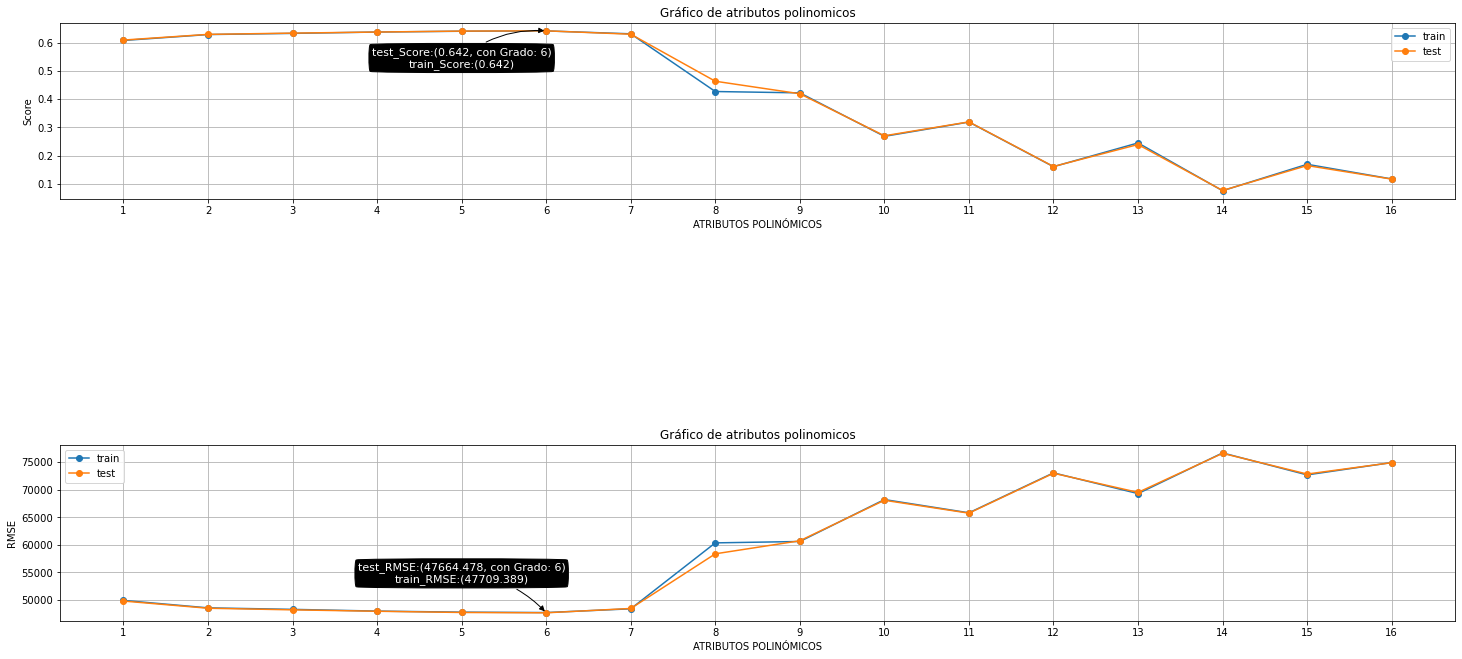

In [343]:
for i in range(0,3):
    graficar(i)

Volvemos a entrenar los modelos, pero esta vez haremos una validación cruzada con kfolds=5 por cada modelo entrenado. 
La función `entrenamiento()` recibe como parámetro `bandera_cv` que le indicará que tendrá que hacer la validación cruzada por cada modelo y así poder graficar los resultados

In [115]:
%%time
X = np.array(data_2.drop(columns='price'))
y = np.array(data_2.price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

entrenamiento(15,bandera_arbol=True, bandera_knn=True,bandera_reg=True, bandera_cv=True)
benchmark()

Modelo: Árbol Regressor con Depth=15
 >Raíz del error cuadrático medio en Train: 28540.255
 >Raíz del error cuadrático medio en Test: 38138.28

 >Score del modelo en Train: 0.872
 >Score del modelo en Test: 0.771

Modelo: KNN Regressor con K=2
 >Raíz del error cuadrático medio en Train: 23791.155
 >Raíz del error cuadrático medio en Test: 40424.734

 >Score del modelo en Train: 0.911
 >Score del modelo en Test: 0.743

Modelo: Regresión lineal con Grado=6
 >Raíz del error cuadrático medio en Train: 47709.389
 >Raíz del error cuadrático medio en Test: 47664.478

 >Score del modelo en Train: 0.642
 >Score del modelo en Test: 0.642

Modelo: AdaBoost con ??=1
 >Raíz del error cuadrático medio en Train: 0.0
 >Raíz del error cuadrático medio en Test: 0.0

 >Score del modelo en Train: 0.0
 >Score del modelo en Test: 0.0

Wall time: 2min 56s


La función `benchmark()` ahora recibe como parámetro una bancera_cv para imprimir los resultados de la validación cruzada

In [70]:
benchmark(bandera_cv=True)

Modelo: Árbol Regressor con Depth=15
**Resultados de la validación cruzada**

 >Promedio de Score para train: 0.876
 >Desviación estándar de Score para train: 0.006

 >Promedio de Score para test: 0.637
 >Desviación estándar de Score para test: 0.201

Modelo: KNN Regressor con K=2
 >Promedio de Score para train: 0.915
 >Desviación estándar de Score para train: 0.006

 >Promedio de Score para test: 0.625
 >Desviación estándar de Score para test: 0.154

Modelo: Regresión lineal con Grado=6
 >Promedio de Score para train: 0.611
 >Desviación estándar de Score para train: 0.007

 >Promedio de Score para test: 0.582
 >Desviación estándar de Score para test: 0.05

Modelo: AdaBoost con ??=1


Graficamos los resultados de la validación cruzada

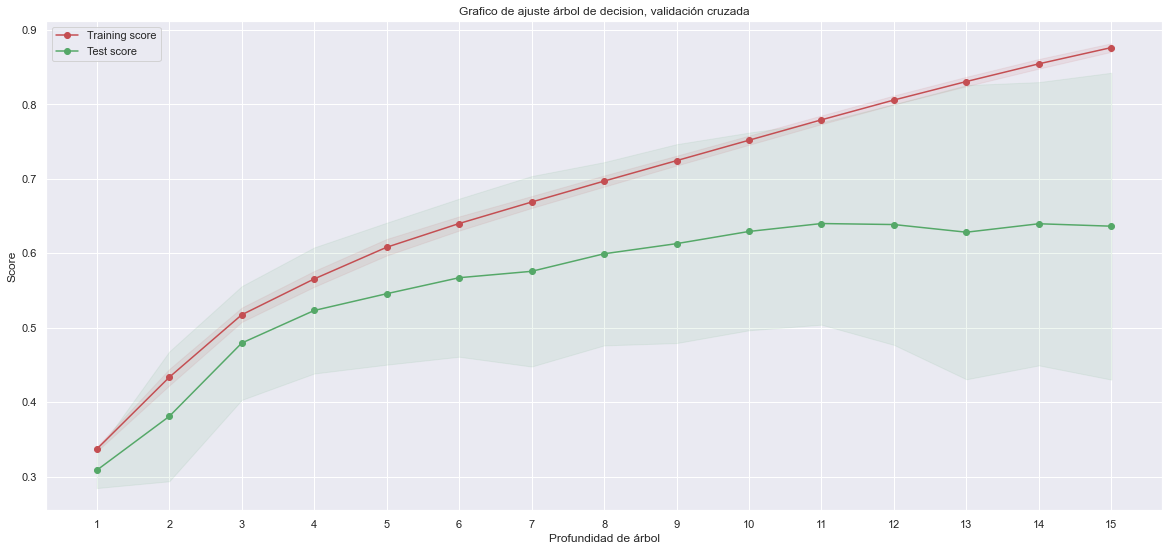

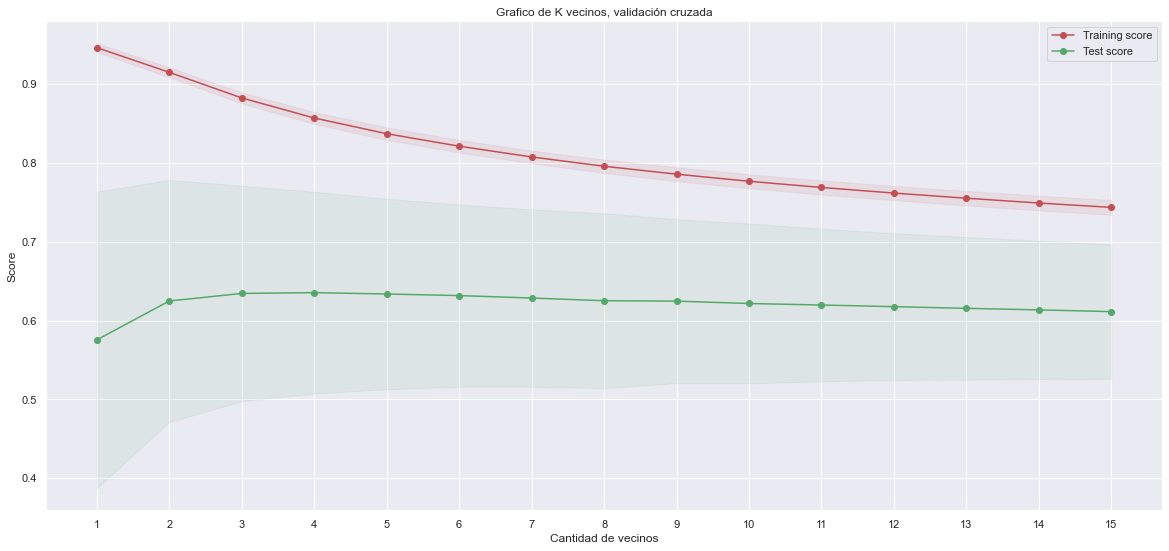

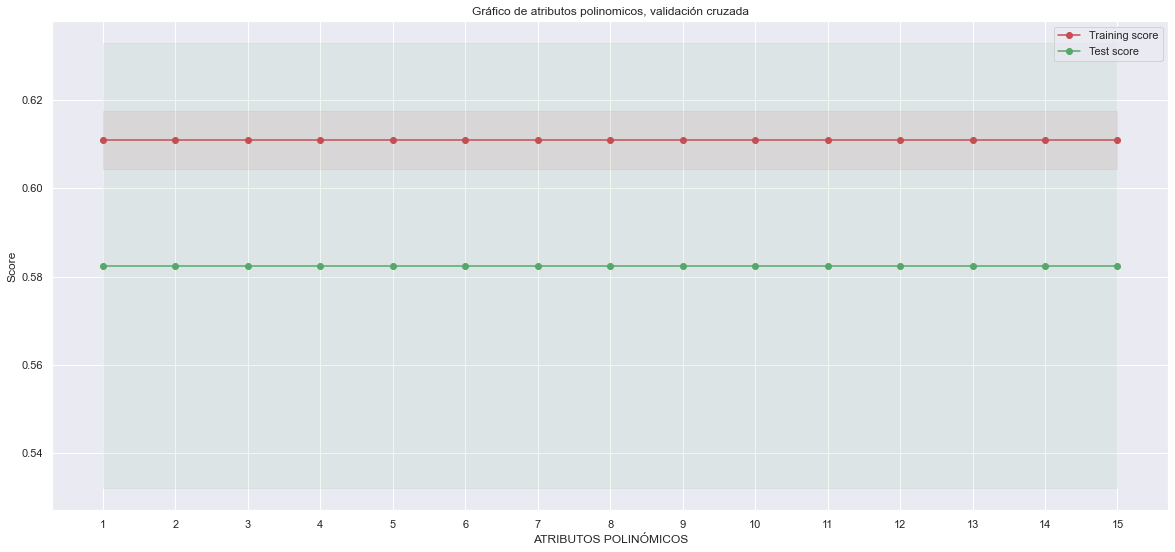

In [116]:
sns.set();
for i in range(0,3):
    graficar(i, True)

> De las validaciones cruzadas se concluye que aún hay mucha variabilidad en los datos

# Probando con `PolynomialFeatures`

Los modelos anteriores trabajaron con una configuración básica para hacer las predicciones. En el caso de `LinearRegression()` este fue elevado a la potencia N con un `for()` sencillo. Ahora, haremos esta regresión con `PolynomialFeatures`

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

reg_2_test = []
reg_2_train = []
Grados = []

Definiremos dos funciones: para evaluar los modelos y graficar los resultados. Teniendo en cuenta siempre el mejor `.Score` sobre los valores del test

In [9]:
def evaluar_regresion (modelo, fin = 2):
    '''Esta función recibe como parámetro `model` para entrenar y hacer predicctión con el modelo que se le indicará
    ,también como parámetro `fin` para aplicar el `PolynomialFeatures` al grado que se indique en ``fin'''
    
    global reg_2_test, reg_2_train, Grados
    reg_2_test[:] = []
    reg_2_train[:] = []
    Grados[:] = []
    
    for i in np.arange(1,fin+1):
        Grados.append(i)
        X = np.array(data_2.drop(columns='price'))
        X = X.reshape(-1,X.shape[1])

        y = np.array(data_2.price)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

        poly = PolynomialFeatures(i, include_bias=False)
        X_train_new = poly.fit_transform(X_train)
        X_test_new = poly.fit_transform(X_test)
        modelo.fit(X_train_new, y_train)
        reg_2_train.append(modelo.score(X_train_new, y_train))
        reg_2_test.append(modelo.score(X_test_new, y_test))

def graficar_regresion(titulo=0):
    best_grado = np.argmax(reg_2_test) +1
    titulos = ['PolynomialFeatures', 'Ridge', 'Lasso']
    plt.figure(figsize=(24,9))
    plt.plot(Grados,np.array(reg_2_train), 'o-', label='Train', )
    plt.plot(Grados,np.array(reg_2_test), 'o-',label='Test')
    plt.title(f'Score por cada grado polinómico con {titulos[titulo]}')
    plt.xticks(Grados)
    plt.grid()
    plt.legend()
    plt.ylabel('Score')
    plt.xlabel('Grado polinomico')
    
    plt.annotate(f"Grado: {best_grado}\n"
             +f"Score_test: {round(reg_2_test[best_grado-1],4)}"
        ,xy=(best_grado,reg_2_test[best_grado-1])
        ,xytext=(best_grado, reg_2_test[best_grado-1]*1.05)
        ,size=11
        ,va="center"
        ,ha="center"
        ,color='white'
        ,bbox=dict(boxstyle="round4", fc="black")
        ,arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-0.2",fc="black"), 
         )
    
    plt.show()    

Entrenaremos una Regresión Lineal sin regulización hasta el grado 5 y luego veremos su `score()`

In [44]:
%%time
reg_2 = LinearRegression()
evaluar_regresion(reg_2, 5)

Wall time: 26.3 s


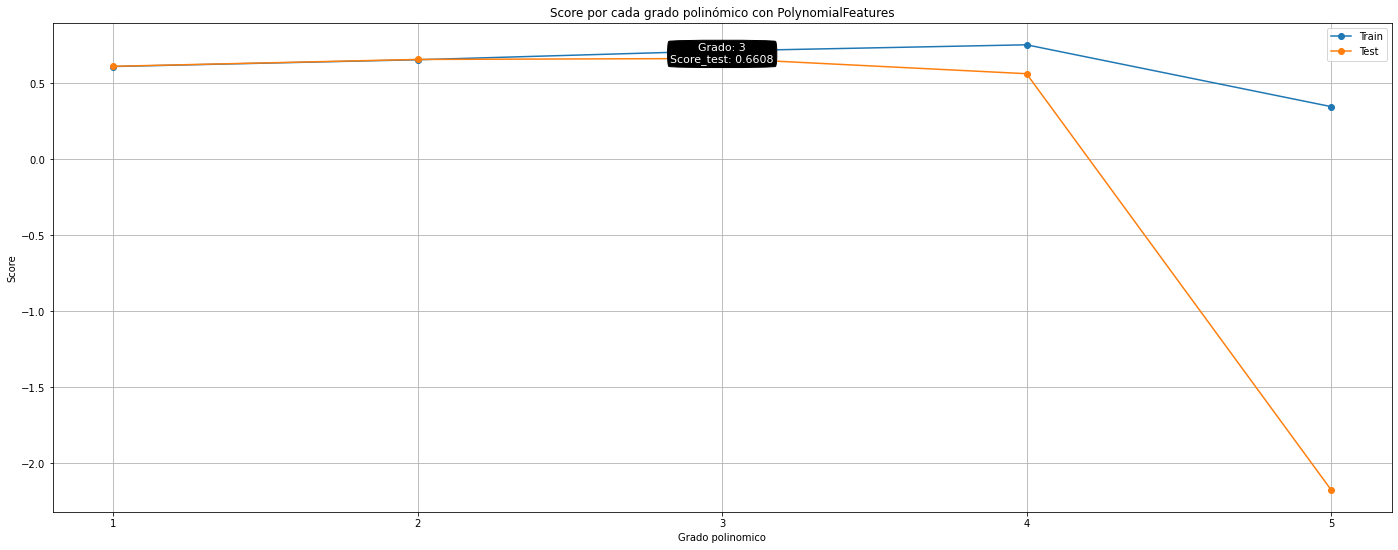

In [51]:
graficar_regresion(titulo=0)

> Se entrenó el dataset para predecir el `price` con `PolynomialFeatures` desde grado 1 hasta 5, luego se graficó los resultados del `score` y se aprecia que el mejor grado polinómico es el `grado 3` obteniendo un score de `0.6608`

# Regularización con  y `Ridge` `Lasso`


Ahora, entrenaremos un modelo de regresión lineal con regularización `Ridge` también hasta el grado 5

In [20]:
%%time
reg_ridge = Ridge(alpha=0)
evaluar_regresion(reg_ridge, 5)

Wall time: 9.62 s


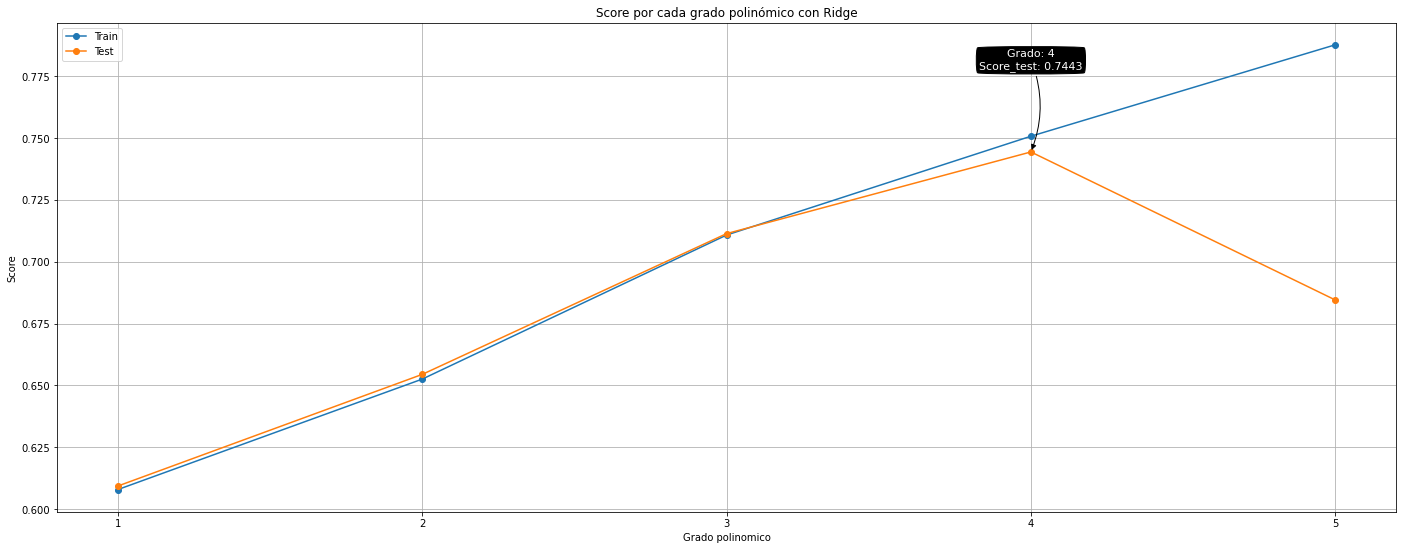

In [21]:
graficar_regresion(titulo=1)

> Al hacer la regularización con Ridge, se obtiene que el mejor grado polinómico es `4` con `alpha: 0.0` dando un score de: `0.7443`.

Haremos lo mismo con `Lasso`

In [10]:
%%time
reg_lasso = Lasso(alpha = 0.01)
evaluar_regresion(reg_lasso, 5)

Wall time: 4min 16s


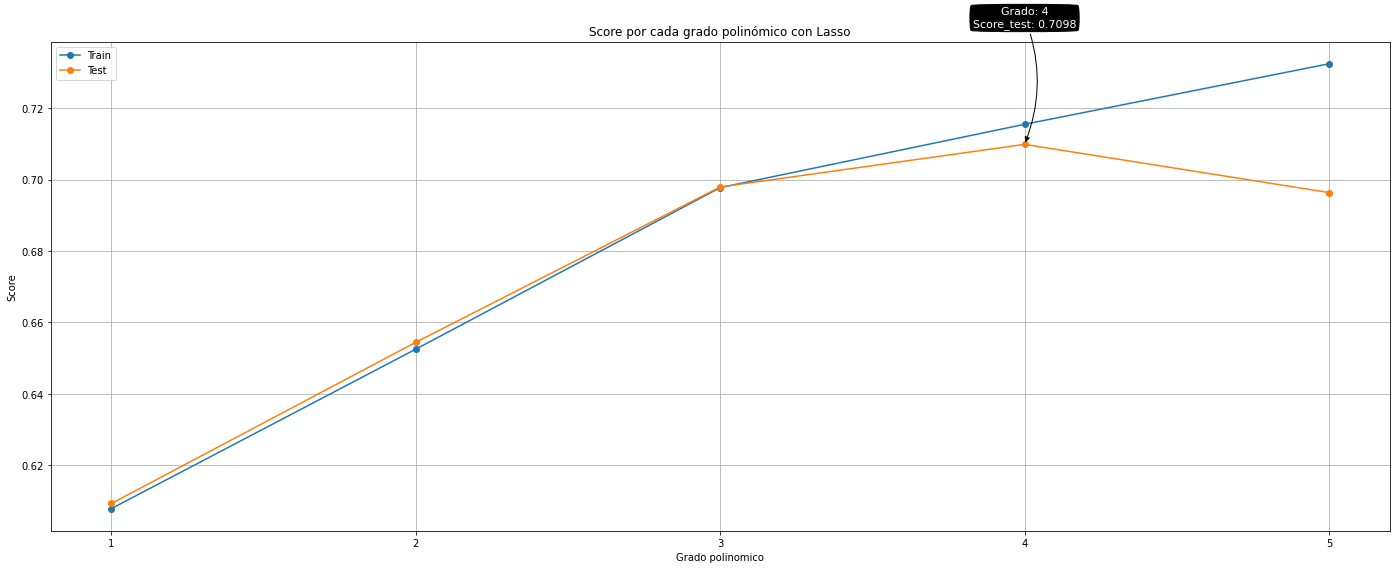

In [11]:
graficar_regresion(titulo=2)

> Al hacer la regularización con `Lasso`, se obtiene que el mejor grado polinómico es `4` con `alpha: 0.01` dando un score de: `0.7098`.

# Entrenando con AdaBoost

La función `entrenamiento()` se ha modificado para cuando lo invoquemos también pueda hacer un entrenamiento de AdaBoost.
Se entrenará un AdaBoost con profundidad `None`

In [176]:
%%time
X = np.array(data_2.drop(columns='price'))
y = np.array(data_2.price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
entrenamiento(15, bandera_arbol=True, bandera_knn=True, bandera_reg=True, bandera_AdaBoost=True,n_Ada=30, n_AdaDepth=None)

Wall time: 1min 26s


In [177]:
benchmark()

Modelo: Árbol Regressor con Depth=15
 >Raíz del error cuadrático medio en Train: 28585.949
 >Raíz del error cuadrático medio en Test: 39921.872

 >Score del modelo en Train: 0.871
 >Score del modelo en Test: 0.749

Modelo: KNN Regressor con K=8
 >Raíz del error cuadrático medio en Train: 48717.153
 >Raíz del error cuadrático medio en Test: 56020.147

 >Score del modelo en Train: 0.626
 >Score del modelo en Test: 0.506

Modelo: Regresión lineal con Grado=3
 >Raíz del error cuadrático medio en Train: 48660.426
 >Raíz del error cuadrático medio en Test: 48591.877

 >Score del modelo en Train: 0.627
 >Score del modelo en Test: 0.628

Modelo: AdaBoost con n_stimators=1
 >Raíz del error cuadrático medio en Train: 937.727
 >Raíz del error cuadrático medio en Test: 34079.71

 >Score del modelo en Train: 1.0
 >Score del modelo en Test: 0.817



> Para la función de `entrenamiento()` hermos overfiteado nuesto AdaBoost con 30 estimadores y teniendo un `score` de `0.817`.

## Mejorando el AdaBoost con GridSearch

In [66]:
from sklearn.model_selection import GridSearchCV

In [264]:
%%time
X = np.array(data_2.drop(columns='price'))
y = np.array(data_2.price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

estimador_Arbol = DecisionTreeRegressor(max_depth=None, random_state=42)
AdaBoost_Grid = GridSearchCV(
                    estimator=AdaBoostRegressor(estimador_Arbol, random_state=42),
                    param_grid= {'n_estimators': [80,100,150, 200],
                                'learning_rate': [0.35, 0.4, 0.45, 0.5]},
                    cv = 4, verbose=0, n_jobs=-1,
                            )
AdaBoost_Grid.fit(X_train, y_train)
AdaBoost_Grid.best_params_

    

Wall time: 45min 33s


{'learning_rate': 0.5, 'n_estimators': 200}

Anteriormente se trabajó con otros valorse de búsquedas y se tuvieron los siguientes resultados
* 1. {'learning_rate': 0.25, 'n_estimators': 60, 'max_depth': none}
> `Score: 0.82`, tiempo de ejecución: 

* 2. {'learning_rate': 0.35, 'n_estimators': 80}
> `Score: 0.822` tiempo de ejecución 13min 45s

* 3. {'learning_rate': 0.5, 'n_estimators': 200}
> `Score: 0.824` tiempo de ejecución 45min 33s

* Se trabajará con la primera configuración al set computacionalmente más sencillo y no varía mucho el `score`

In [67]:
%%time
X = np.array(data_2.drop(columns='price'))
y = np.array(data_2.price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
entrenamiento(15,bandera_AdaBoost=True, Ada_learning_rate=0.25, n_Ada=60, n_AdaDepth=None, bandera_arbol=True, bandera_knn=True, bandera_reg=True)

Wall time: 1min 48s


In [68]:
%%time
benchmark()

Modelo: Árbol Regressor con Depth=15
 >Raíz del error cuadrático medio en Train: 28540.321
 >Raíz del error cuadrático medio en Test: 38256.405

 >Score del modelo en Train: 0.872
 >Score del modelo en Test: 0.769

Modelo: KNN Regressor con K=2
 >Raíz del error cuadrático medio en Train: 23791.155
 >Raíz del error cuadrático medio en Test: 40424.734

 >Score del modelo en Train: 0.911
 >Score del modelo en Test: 0.743

Modelo: Regresión lineal con Grado=6
 >Raíz del error cuadrático medio en Train: 47709.389
 >Raíz del error cuadrático medio en Test: 47664.478

 >Score del modelo en Train: 0.642
 >Score del modelo en Test: 0.642

Modelo: AdaBoost con ??=1
 >Raíz del error cuadrático medio en Train: 14038.327
 >Raíz del error cuadrático medio en Test: 32187.279

 >Score del modelo en Train: 0.969
 >Score del modelo en Test: 0.837

Wall time: 1.99 ms


# Parte C


## 1. Interpretación de los modelos
### Importancia de los features y resultado de cada modelo

> **Regresión Lineal**: Cuando hicimos el entrenamiento con este modelo, se tuvo en cuenta que se trabajaría con d-dimensiones: $Y = m_{1}x_{1} + m_{2}x_{2} + m_{3}x_{3}  + ... + b$. A esta regresión se aplicó la regularización `Ridge` y `Lasso`, pero no podemos determinar que coeficientes fueron los más relevantes ya que se aplicó el `PCA()` y lugo el `PolinomialFeatures`.

> **Árbol regressoor**: En la gráfica mostrada arriba, se aprecia que a medida que vaya avanzando en la profundidad este tenderá al `overfitting` rápidamente., por lo cual deberemos escoger un número relativamente pequeño de profundidad para tener una mejor relación entre el `score()` para test y train. Ahora, cuando hicimos la validación cruzada se vio que este  presentaba una gran variabilidad (sombra muy alta). Pero, también es dificíl determinar qué feature es más relevante puesto que al aplicar la redución de dimensionalidad con `PCA()` perdemos la info de que columna está interviniendo y solo lo tendremos con nombre generalizado.

> Por ello es importante haber elegido las columnas más **importantes** antes de aplicar la reducción de dimensionalidad. Para este proyecto, se eliminaron muchas columnas (fechas, texto de descripción, lat, long, etc) que no aportaban información relevante, como también se eliminaron algunas instancias (cuando nos quedamos con solo 3 tipos de propiedad) de las columnas restantes que representaban una minoria, también los valores errados como `surface_covered`> `surface_total`, etc. Todo esa filtración de valores antes de aplicar el `PCA()`

### Validación cruzada

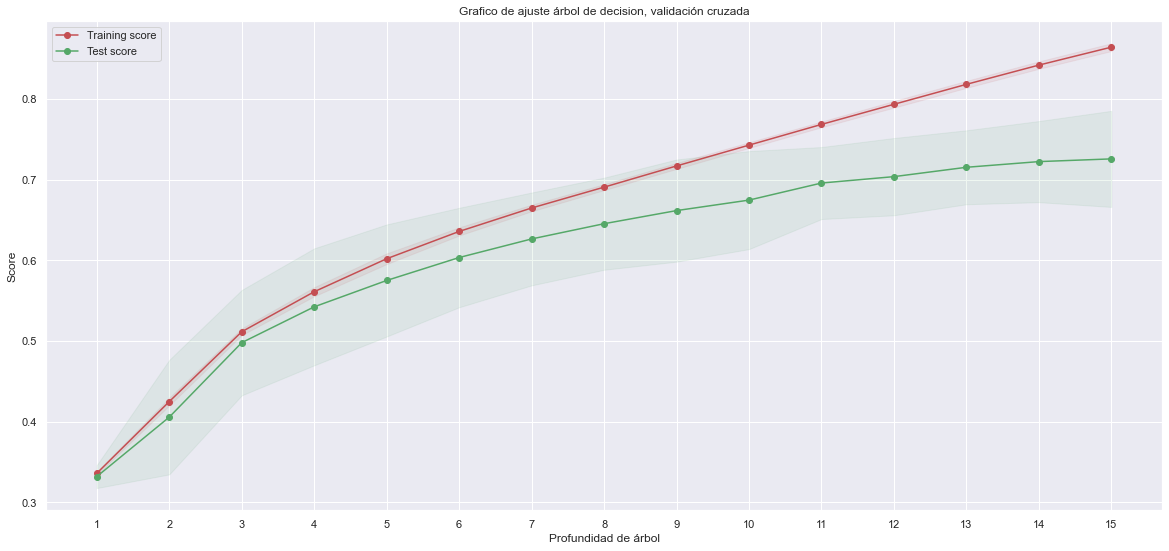

Wall time: 4min 3s


In [117]:
%%time
entrenamiento(15,bandera_arbol=True, bandera_knn=True, bandera_reg=True,  bandera_cv=True, k_CV=9)
graficar(0, True) #Graficamos la validación cruzada para el modelo de Árbol de decisión


Interpretando la curva de validación se evidencia que el modelo no se encuentra en un región de underfitting, pero mientras va aumentando la profundidad este tiende al overfitting rápidamente. La sombra para los valores del test se un poco alta, indicando mucha variabilidad. Una revisión más exhaustiva del data set podría ayudarnos mejorar un poco el resultado. 

## 2. Errores

Examinaremos la distribución de errores del modelo `AdaBoost`

In [124]:
y_train_pred_Ada = AdaBoost_modelo.predict(X_train)
y_test_pred_Ada = AdaBoost_modelo.predict(X_test)

El error es el valor real menos el predicho, haremos una distribución de los errores mostrados eligiendo como delo el `AdaBoost`

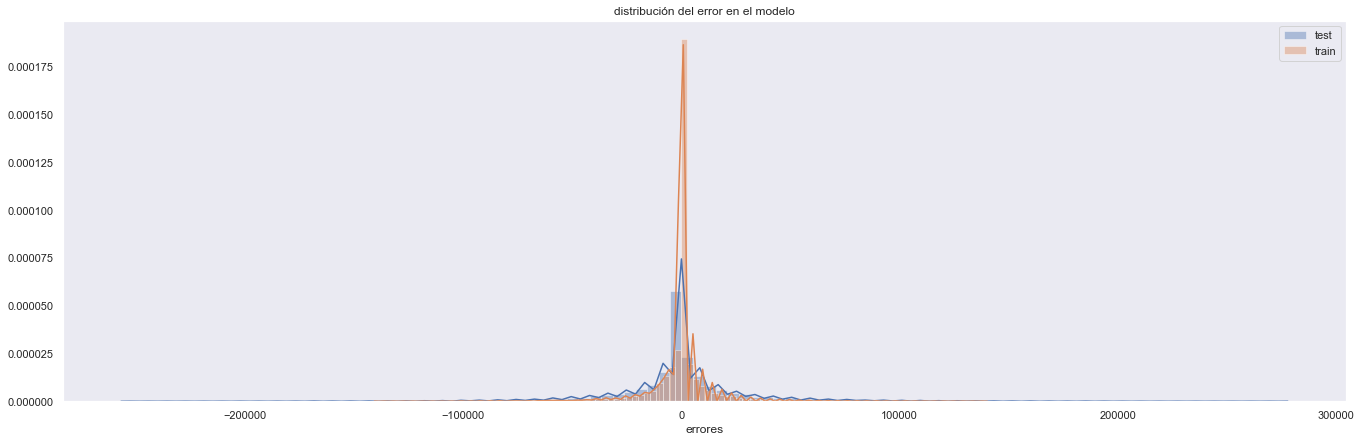

In [142]:
plt.figure(figsize = (23,7))
sns.distplot(y_test - y_test_pred_Ada, bins = 100, label = 'test')
sns.distplot(y_train - y_train_pred_Ada, bins = 100, label = 'train')
plt.title("distribución del error en el modelo")
plt.xlabel('errores')
plt.legend()
plt.grid()
plt.show()

> Cuando el error da 0 sigfnifica que el modelo acertó, se espera que los resultados sen lo más angostos y puntiagudas posibles y cercanos a cero, porque así de refleja resultados menos dispersos. En la gráfica mostrada, vemos que la mayoría de los errores están concentrados y muy cerca a 0, lo cuál es un buen indicador de que nuestro modelo está trabajando bien para los valores del test.

> También es importante destacar que los valores de `train` están muy por encima de los valores del `test`, esto se debe a que cuando entrenamos el modelo `AdaBoost` pusimos que overfitera un poco cuando indicamos `depth: None`

## 3. Conclusiones sobre los modelos entrenados para la predicción de la variable `price` del `data_2`
* De los modelos entrenados, se obtuvieron lo siguientes `score` en los valores del test

> **Árbol regressor** con `depth: 15`, se obtuvo un `score:0.749`
>> Entrenar este modelo, tiende a ir al overfitting con facilidad mientras vaya aumentando la profundidad. Pero el coste computacional es menor.

> **KNN regressor** con `K: 8`, se obtuvo un `score: 0.506`
>> Entrenar este modelo, tiende a ir al overfitting con facilidad mientras vaya aumentando la profundidad. Pero el coste computacional es alto por la distancia de los puntos de `price`.

> **Regresión lineal** con `Grado: 3`, se obtuvo un `score: 0.628`
>> Se elevó a la potencia con ciclo `for` hasta el grado indicado. Mientras más grado avanzaba el coste computacional era mayor por estar trabajando con una matriz cada vez más grande.

> **Regresión lineal** con regularización `Ridge` y `Grado: 4`, se obtuvo un `score: 0.7322`
>> Es coste computacional fue menor y los resultados son basantes aceptables.

> **Regresión lineal** con regularización `Lasso` y `Grado: 4`, se obtuvo un `score: 0.7038`
>> Es coste computacional fue **mayor** y los resultados son basantes aceptables.

> **AdaBoostRegressor** optimizado con GridSearch y `{'learning_rate': 0.25, 'n_estimators': 60, 'max_depth': none}` se obtuvo un `score: 0.837`
>> Este modelo tiene un costo computacional menor, pero tiende al overfitting rapidamente. 

* Del dataset original, no se tomó en cuenta todas las columnas para el entrenamiento. También, para la variable `propety_type` no se tomaron en cuenta todas los valores por tener muchas propiedades que no aportaban información relevante al dataset.

* Con la eliminación de los outliers y la reducción del PCA se obtuvo mejores resultados que en el **proyecto 1** que se tenía un `score: 0.69121` con el modelo `Vecinos más cercanos con K=2`

* Finalmente, se usará el modelo **AdaBoostRegressor** para hacer las predicciones de la variable `price` de este dataset

## 4. Recomendaciones:

> Un mejor estudio en elegir menos cantidad de barrios en el data set podría darnos resultados más limpios en los modelos.

> Como los valores faltantes fueron llenados con un modelo `regressor`, este modelo podría optimizarme más detenidamente para tener resultados más precisos al llenado de los valores faltantes. De esta manera, cuando querramos predecir la variable `price`, podríamos tener mejores resultados.

> También, podría ser intersante aplicar PNL en la columna de descripción para destacar algunas palabras que llama la atención de las personas cuando eligen una propiedad para alquilarla o comprarla. Al detectar las palabras que más les llaman la atención podriamos usarlas en algunos campos para aumentar su probabilidad de que esta sea alquilada o comprada. 

> Las columnas de tipo fecha que no están presenten podrían usarse en un futuro para determinar si influye **cuando** fue publicado una propiedad y esta afecta al precio. O, hacer series de tiempo para ver la evolución del precio a lo largo del tiempo y predecir el valor de una vivienda a un futuro cercano. Por ejemplo, indicarle a la persona que alquila o compra la propiedad en cuanto aumentaría su valor a futuro